<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_3401-3450.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3926]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [3927]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

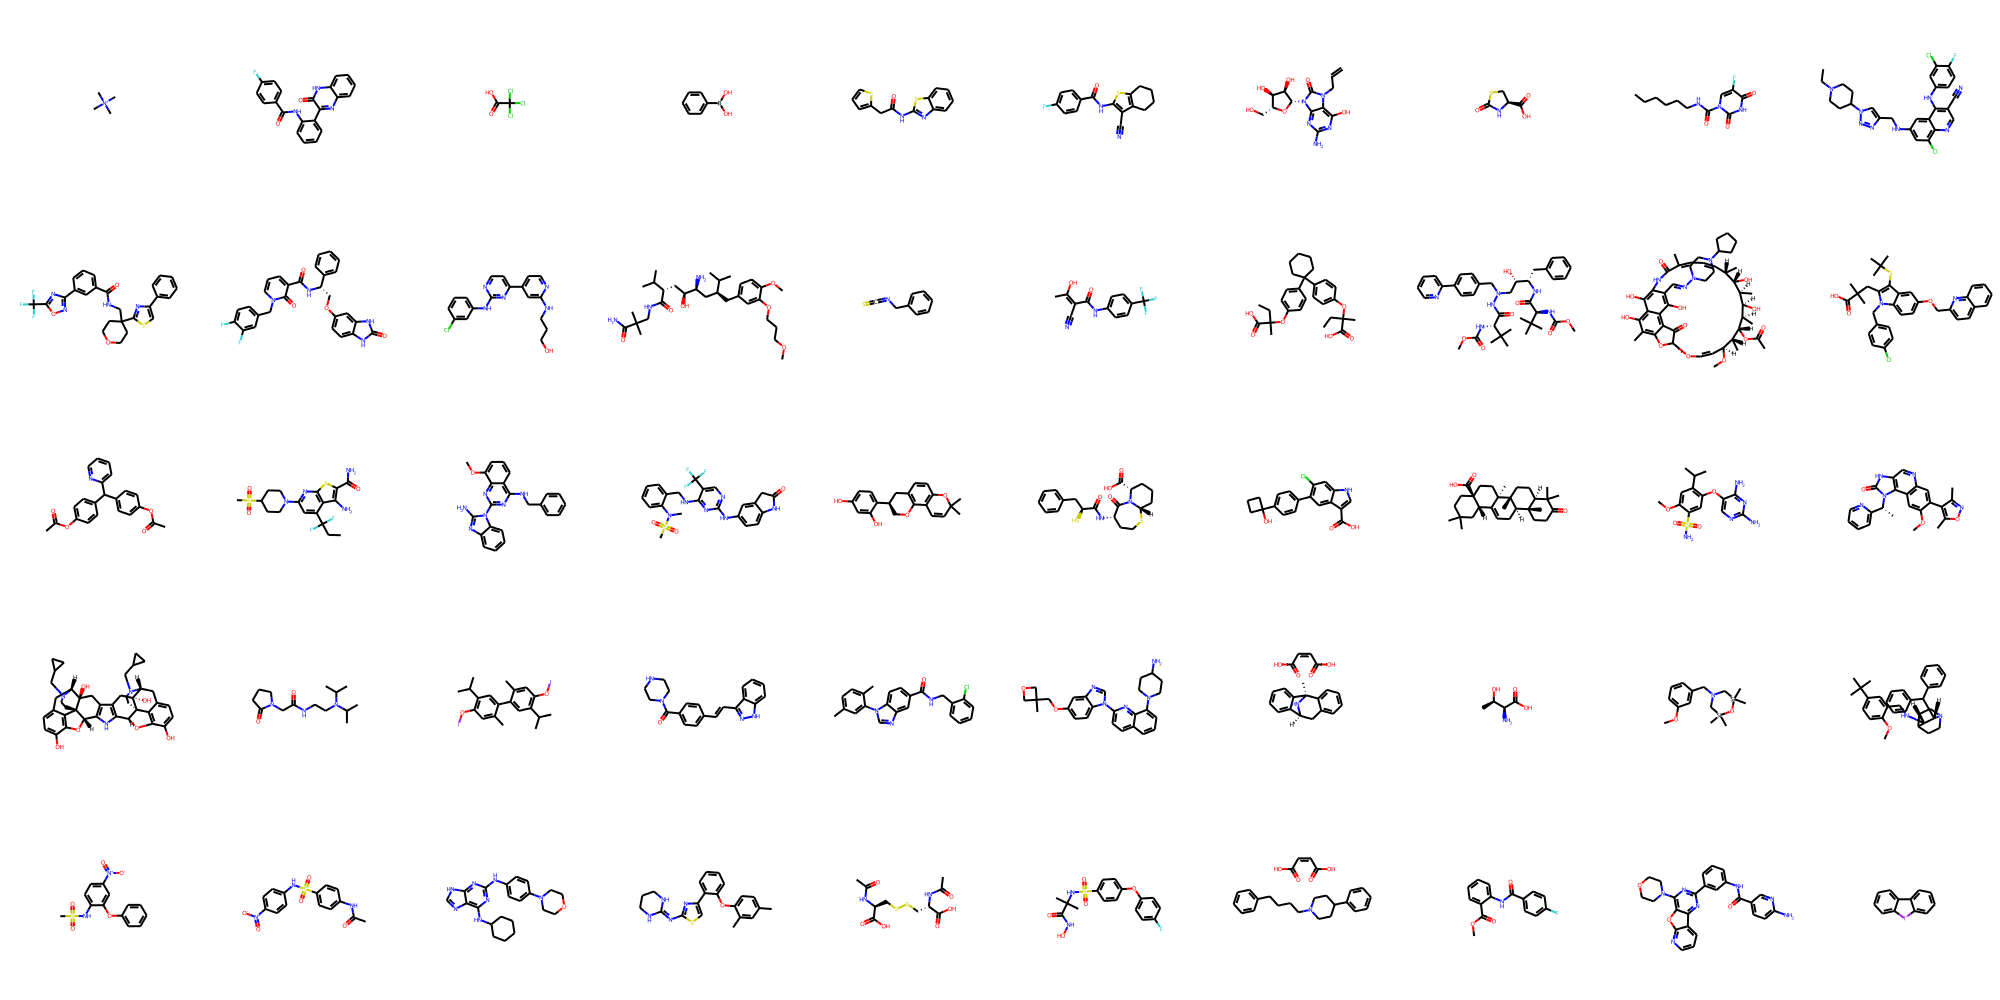

In [3928]:
smiles_list = [

'C[N+](C)(C)C',
'O=C(Nc1ccccc1-c1nc2ccccc2[nH]c1=O)c1ccc(F)cc1',
'O=C(O)C(Cl)(Cl)Cl',
'OB(O)c1ccccc1',
'O=C(Cc1cccs1)Nc1nc2ccccc2s1',
'N#Cc1c(NC(=O)c2ccc(F)cc2)sc2c1CCCC2',
'C=CCn1c(=O)n([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c2nc(N)nc(O)c21',
'O=C1N[C@H](C(=O)O)CS1',
'CCCCCCNC(=O)n1cc(F)c(=O)[nH]c1=O',
'CCN1CCC(n2cc(CNc3cc(Cl)c4ncc(C#N)c(Nc5ccc(F)c(Cl)c5)c4c3)nn2)CC1',
'O=C(NCC1(c2nc(-c3ccccc3)cs2)CCOCC1)c1cccc(-c2noc(C(F)(F)F)n2)c1',
'O=C(N[C@@H](COc1ccc2[nH]c(=O)[nH]c2c1)c1ccccc1)c1cccn(Cc2ccc(F)c(F)c2)c1=O',
'OCCCNc1cc(-c2ccnc(Nc3cccc(Cl)c3)n2)ccn1',
'COCCCOc1cc(C[C@@H](C[C@H](N)[C@@H](O)C[C@H](C(=O)NCC(C)(C)C(N)=O)C(C)C)C(C)C)ccc1OC',
'S=C=NCc1ccccc1',
'C/C(O)=C(\C#N)C(=O)Nc1ccc(C(F)(F)F)cc1',
'CCC(C)(Oc1ccc(C2(c3ccc(OC(C)(CC)C(=O)O)cc3)CCCCC2)cc1)C(=O)O',
'COC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CN(Cc1ccc(-c2ccccn2)cc1)NC(=O)[C@@H](NC(=O)OC)C(C)(C)C)C(C)(C)C',
'CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(c(/C=N/N5CCN(C6CCCC6)CC5)c(O)c4c3C2=O)NC(=O)/C(C)=C\C=C\[C@H](C)[C@H](O)[C@@H](C)[C@@H](O)[C@@H](C)[C@H](OC(C)=O)[C@@H]1C',
'CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3ccc4ccccc4n3)cc12',
'CC(=O)Oc1ccc(C(c2ccc(OC(C)=O)cc2)c2ccccn2)cc1',
'CCC(F)(F)c1cc(N2CCC(S(C)(=O)=O)CC2)nc2sc(C(N)=O)c(N)c12',
'COc1cccc2c(NCc3ccccc3)nc(-n3c(N)nc4ccccc43)nc12',
'CN(c1ccccc1CNc1nc(Nc2ccc3c(c2)CC(=O)N3)ncc1C(F)(F)F)S(C)(=O)=O',
'CC1(C)C=Cc2c(ccc3c2OC[C@@H](c2ccc(O)cc2O)C3)O1',
'O=C(N[C@H]1CCS[C@H]2CCC[C@@H](C(=O)O)N2C1=O)[C@@H](S)Cc1ccccc1',
'O=C(O)c1c[nH]c2cc(Cl)c(-c3ccc(C4(O)CCC4)cc3)cc12',
'CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@@]5(C)CCC(=O)C(C)(C)[C@@H]5CC[C@]43C)[C@@H]2C1',
'COc1cc(C(C)C)c(Oc2cnc(N)nc2N)cc1S(N)(=O)=O',
'COc1cc2c(cc1-c1c(C)noc1C)ncc1[nH]c(=O)n([C@H](C)c3ccccn3)c12',
'Oc1ccc2c3c1O[C@H]1c4[nH]c5c(c4C[C@@]4(O)[C@@H](C2)N(CC2CC2)CC[C@]314)C[C@@]1(O)[C@H]2Cc3ccc(O)c4c3[C@@]1(CCN2CC1CC1)[C@H]5O4',
'CC(C)N(CCNC(=O)CN1CCCC1=O)C(C)C',
'Cc1cc(OI)c(C(C)C)cc1-c1cc(C(C)C)c(OI)cc1C',
'O=C(c1ccc(/C=C/c2n[nH]c3ccccc23)cc1)N1CCNCC1',
'Cc1ccc(C)c(-n2cnc3cc(C(=O)NCc4ccccc4Cl)ccc32)c1',
'CC1(COc2ccc3c(c2)ncn3-c2ccc3cccc(N4CCC(N)CC4)c3n2)COC1',
'C[C@@]12N[C@@H](Cc3ccccc31)c1ccccc12.O=C(O)/C=C\C(=O)O',
'C[C@@H](O)[C@H](N)C(=O)O',
'COc1cccc(CN2C[Si](C)(C)O[Si](C)(C)C2)c1',
'COc1ccc(C(C)(C)C)cc1CN[C@H]1C2CCN(CC2)[C@H]1C(c1ccccc1)c1ccccc1',
'CS(=O)(=O)Nc1ccc([N+](=O)[O-])cc1Oc1ccccc1',
'CC(=O)Nc1ccc(S(=O)(=O)Nc2ccc([N+](=O)[O-])cc2)cc1',
'c1nc2c(NC3CCCCC3)nc(Nc3ccc(N4CCOCC4)cc3)nc2[nH]1',
'Cc1ccc(Oc2ccccc2-c2csc(N=C3NCCCN3)n2)c(C)c1',
'CC(=O)N[C@@H](CSSC[C@H](NC(C)=O)C(=O)O)C(=O)O',
'CC(C)(NS(=O)(=O)c1ccc(Oc2ccc(F)cc2)cc1)C(=O)NO',
'O=C(O)/C=C\C(=O)O.c1ccc(CCCCN2CCC(c3ccccc3)CC2)cc1',
'COC(=O)c1ccccc1NC(=O)c1ccc(F)cc1',
'Nc1ccc(C(=O)Nc2cccc(-c3nc(N4CCOCC4)c4oc5ncccc5c4n3)c2)cn1',
'c1ccc2c(c1)[I+]c1ccccc1-2',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



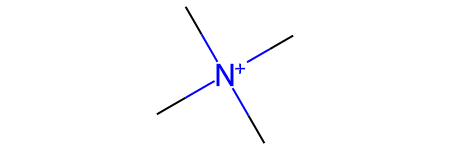

In [3929]:
M1 = mol_list [0]
M1

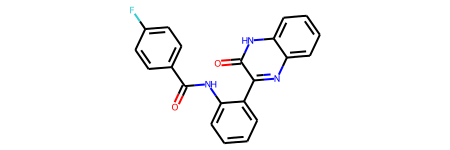

In [3930]:
M2 = mol_list [1]
M2

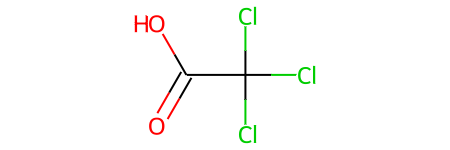

In [3931]:
M3 = mol_list [2]
M3

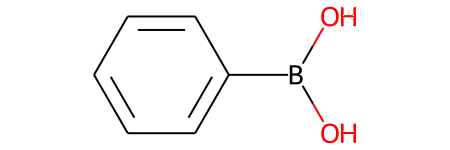

In [3932]:
M4 = mol_list [3]
M4

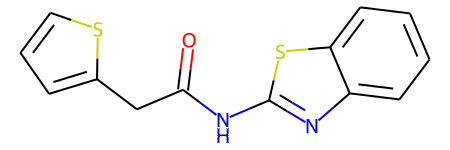

In [3933]:
M5 = mol_list [4]
M5

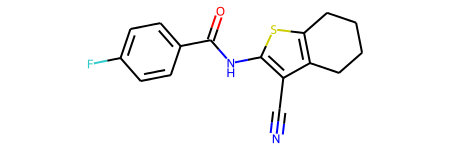

In [3934]:
M6 = mol_list [5]
M6

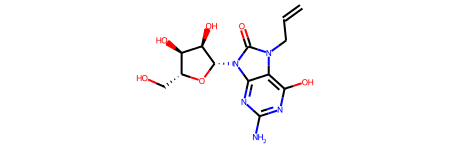

In [3935]:
M7 = mol_list [6]
M7

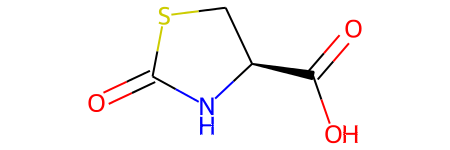

In [3936]:
M8 = mol_list [7]
M8

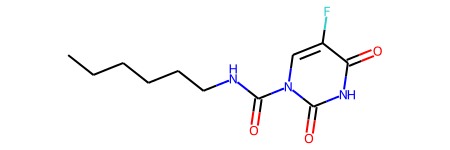

In [3937]:
M9 = mol_list [8]
M9

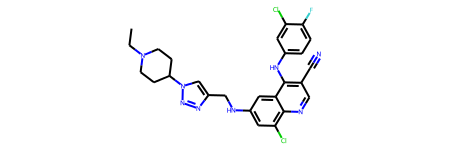

In [3938]:
M10 = mol_list [9]
M10

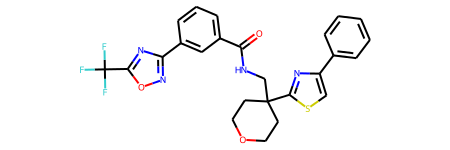

In [3939]:
M11 = mol_list [10]
M11

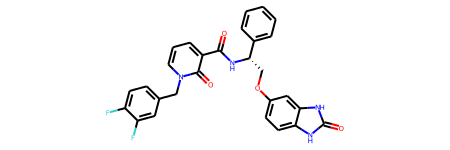

In [3940]:
M12 = mol_list [11]
M12

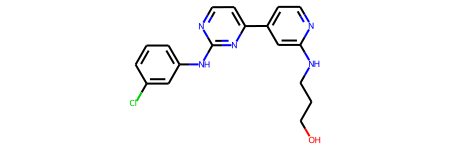

In [3941]:
M13 = mol_list [12]
M13

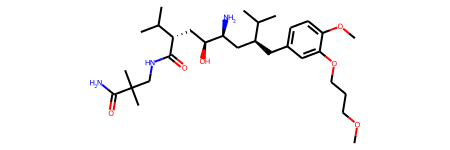

In [3942]:
M14 = mol_list [13]
M14

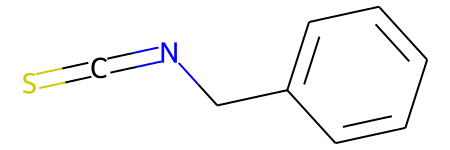

In [3943]:
M15 = mol_list [14]
M15

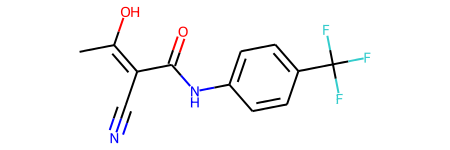

In [3944]:
M16 = mol_list [15]
M16

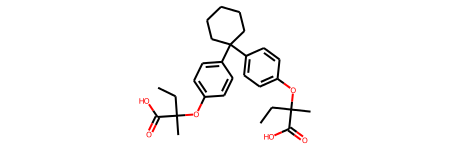

In [3945]:
M17 = mol_list [16]
M17

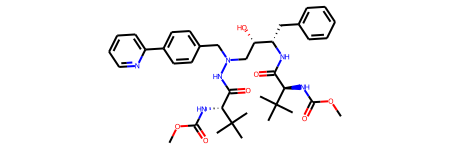

In [3946]:
M18 = mol_list [17]
M18

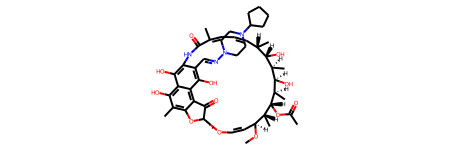

In [3947]:
M19 = mol_list [18]
M19

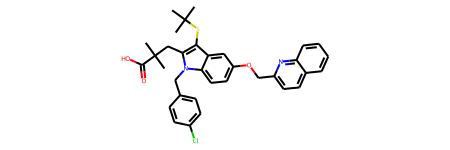

In [3948]:
M20 = mol_list [19]
M20

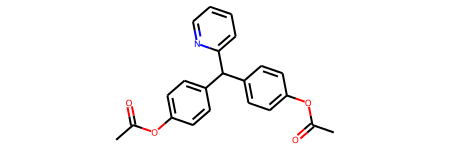

In [3949]:
M21 = mol_list [20]
M21

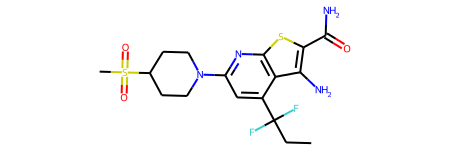

In [3950]:
M22 = mol_list [21]
M22

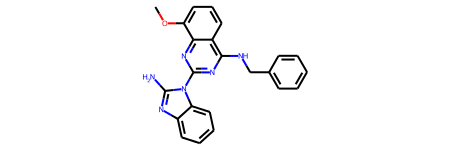

In [3951]:
M23 = mol_list [22]
M23

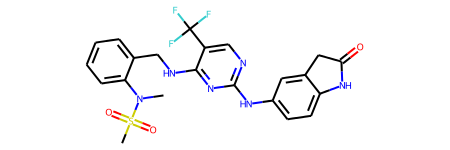

In [3952]:
M24 = mol_list [23]
M24

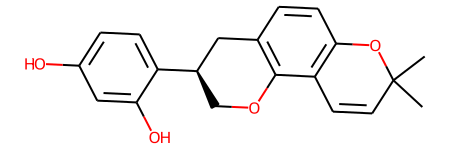

In [3953]:
M25 = mol_list [24]
M25

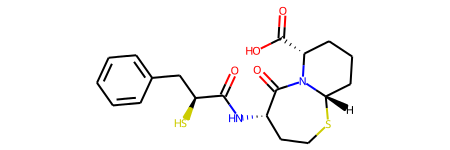

In [3954]:
M26 = mol_list [25]
M26

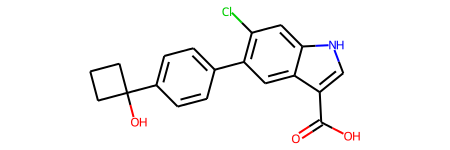

In [3955]:
M27 = mol_list [26]
M27

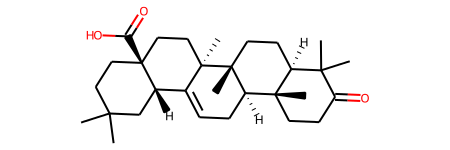

In [3956]:
M28 = mol_list [27]
M28

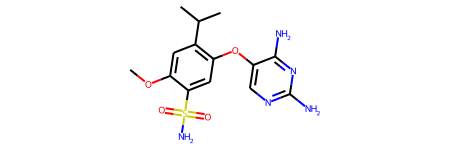

In [3957]:
M29 = mol_list [28]
M29

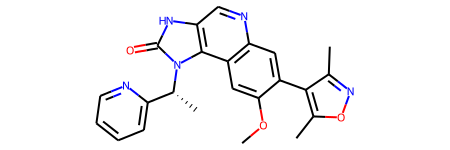

In [3958]:
M30 = mol_list [29]
M30

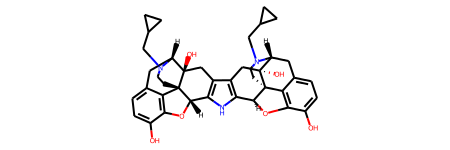

In [3959]:
M31 = mol_list [30]
M31

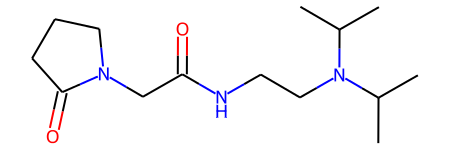

In [3960]:
M32 = mol_list [31]
M32

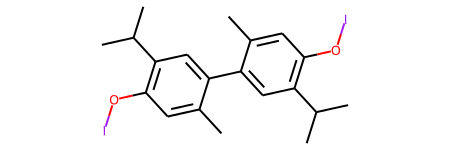

In [3961]:
M33 = mol_list [32]
M33

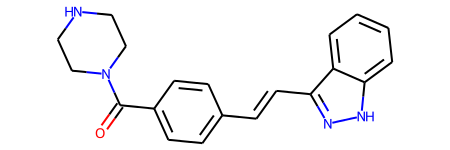

In [3962]:
M34 = mol_list [33]
M34

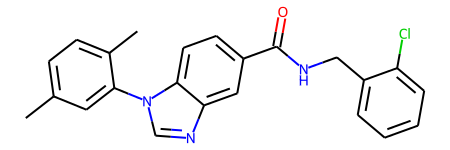

In [3963]:
M35 = mol_list [34]
M35

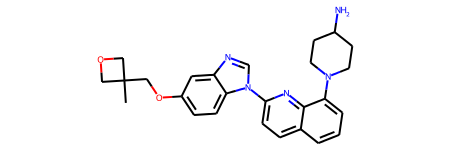

In [3964]:
M36 = mol_list [35]
M36

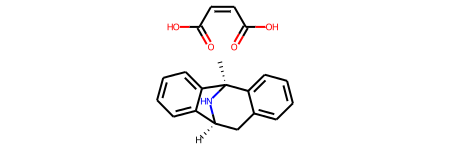

In [3965]:
M37= mol_list [36]
M37

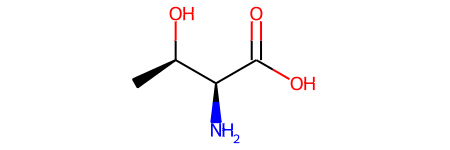

In [3966]:
M38= mol_list [37]
M38

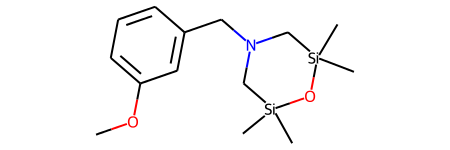

In [3967]:
M39= mol_list [38]
M39

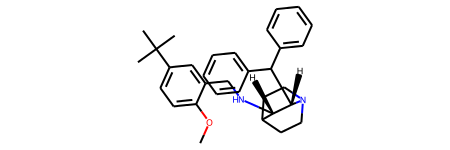

In [3968]:
M40= mol_list [39]
M40

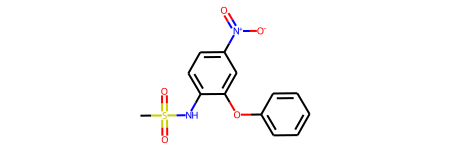

In [3969]:
M41= mol_list [40]
M41

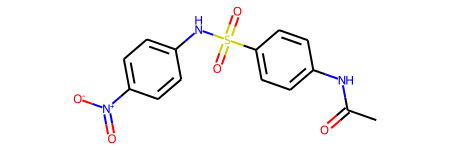

In [3970]:
M42= mol_list [41]
M42

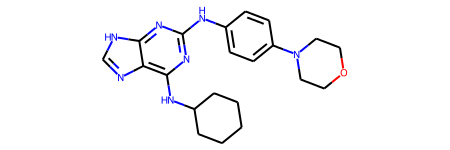

In [3971]:
M43= mol_list [42]
M43

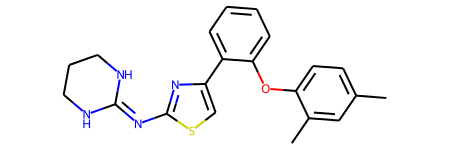

In [3972]:
M44= mol_list [43]
M44

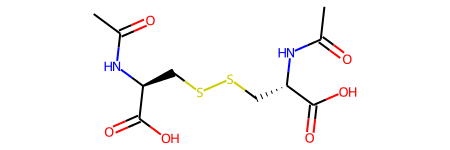

In [3973]:
M45= mol_list [44]
M45

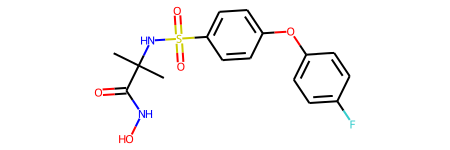

In [3974]:
M46= mol_list [45]
M46

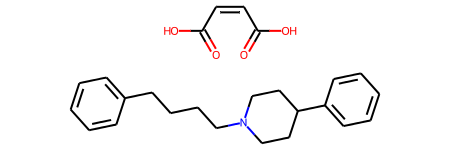

In [3975]:
M47= mol_list [46]
M47

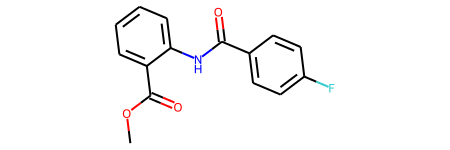

In [3976]:
M48= mol_list [47]
M48

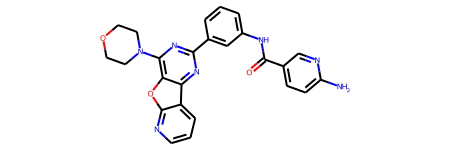

In [3977]:
M49= mol_list [48]
M49

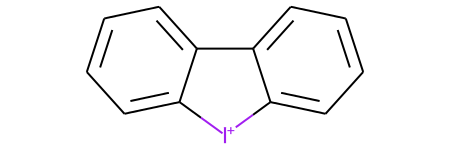

In [3978]:
M50= mol_list [49]
M50

In [3979]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[33, 166, 414, 628]

In [3980]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[64,
 73,
 90,
 119,
 128,
 175,
 200,
 254,
 270,
 274,
 289,
 314,
 323,
 328,
 343,
 352,
 356,
 361,
 378,
 386,
 486,
 535,
 641,
 646,
 650,
 672,
 673,
 699,
 706,
 721,
 726,
 750,
 759,
 771,
 792,
 807,
 830,
 831,
 849,
 893,
 904,
 947,
 984]

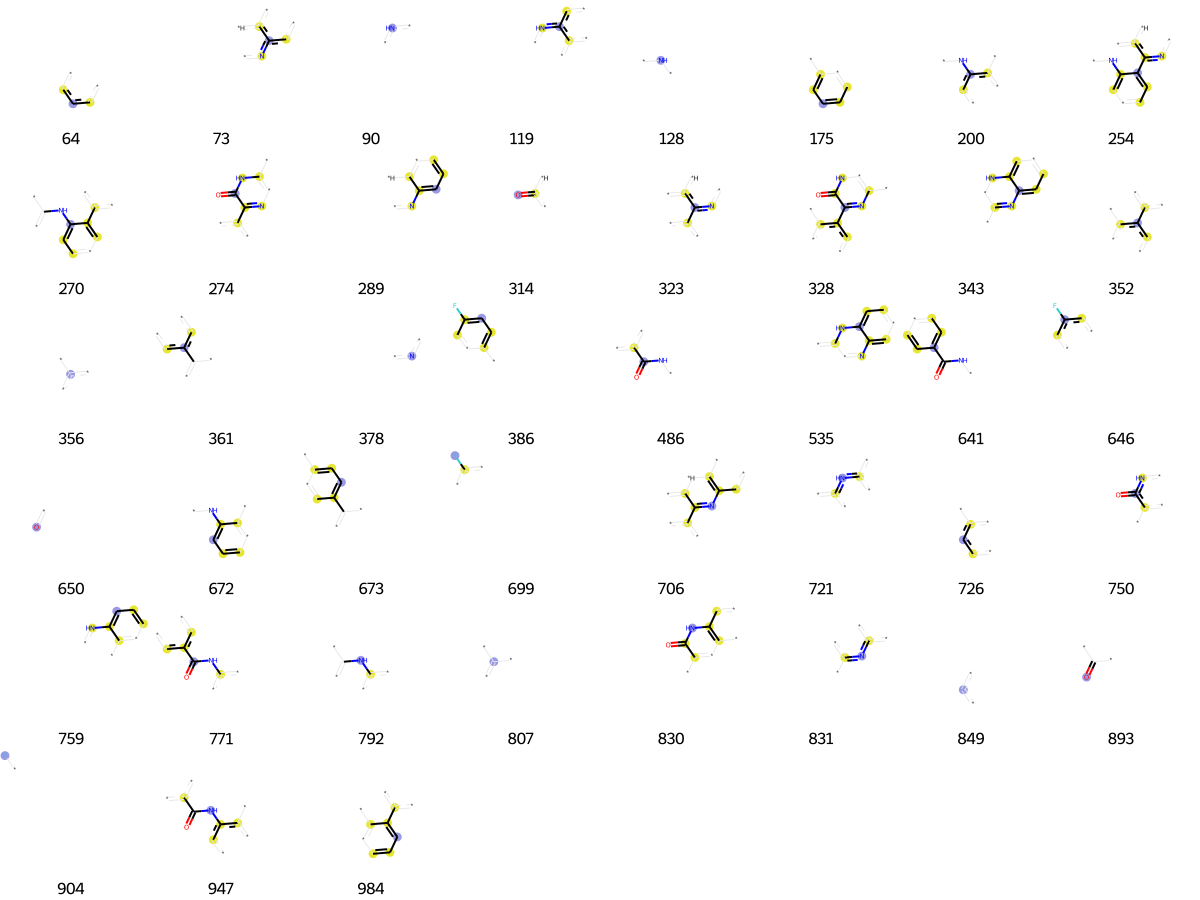

In [3981]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [3982]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[114, 305, 389, 650, 659, 803, 807, 876, 893, 953]

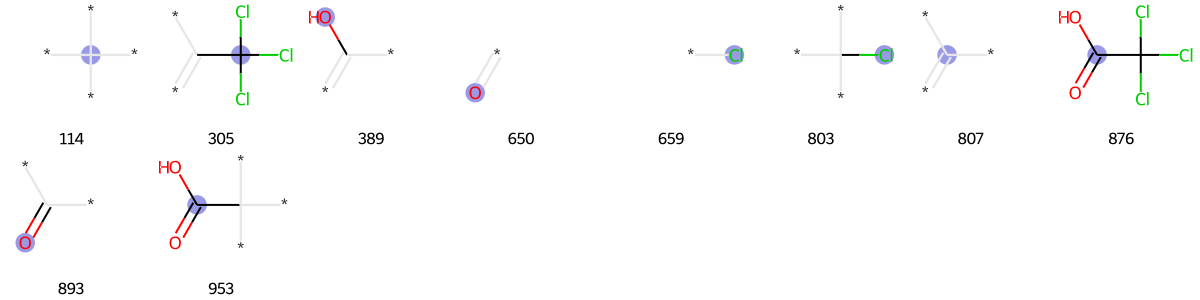

In [3983]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [3984]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[64, 170, 175, 230, 271, 356, 389, 541, 564, 575, 726, 807, 831, 849]

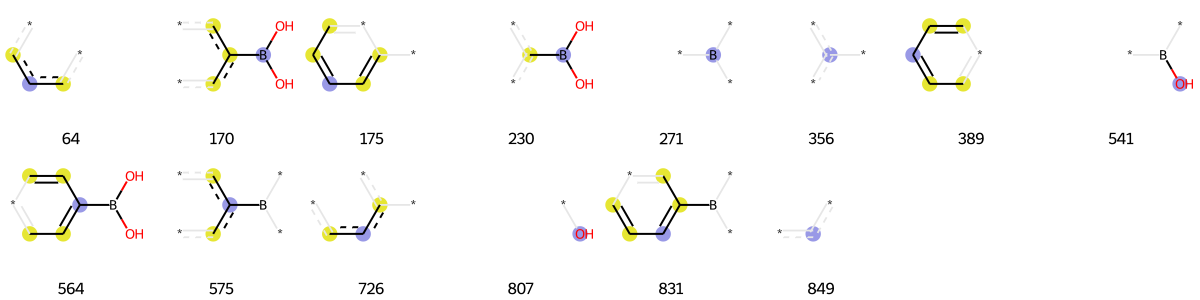

In [3985]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [3986]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[14,
 41,
 64,
 73,
 80,
 128,
 156,
 162,
 175,
 196,
 232,
 241,
 289,
 317,
 325,
 356,
 378,
 383,
 385,
 461,
 543,
 548,
 557,
 650,
 656,
 675,
 716,
 726,
 732,
 735,
 792,
 807,
 831,
 849,
 885,
 893,
 911,
 980]

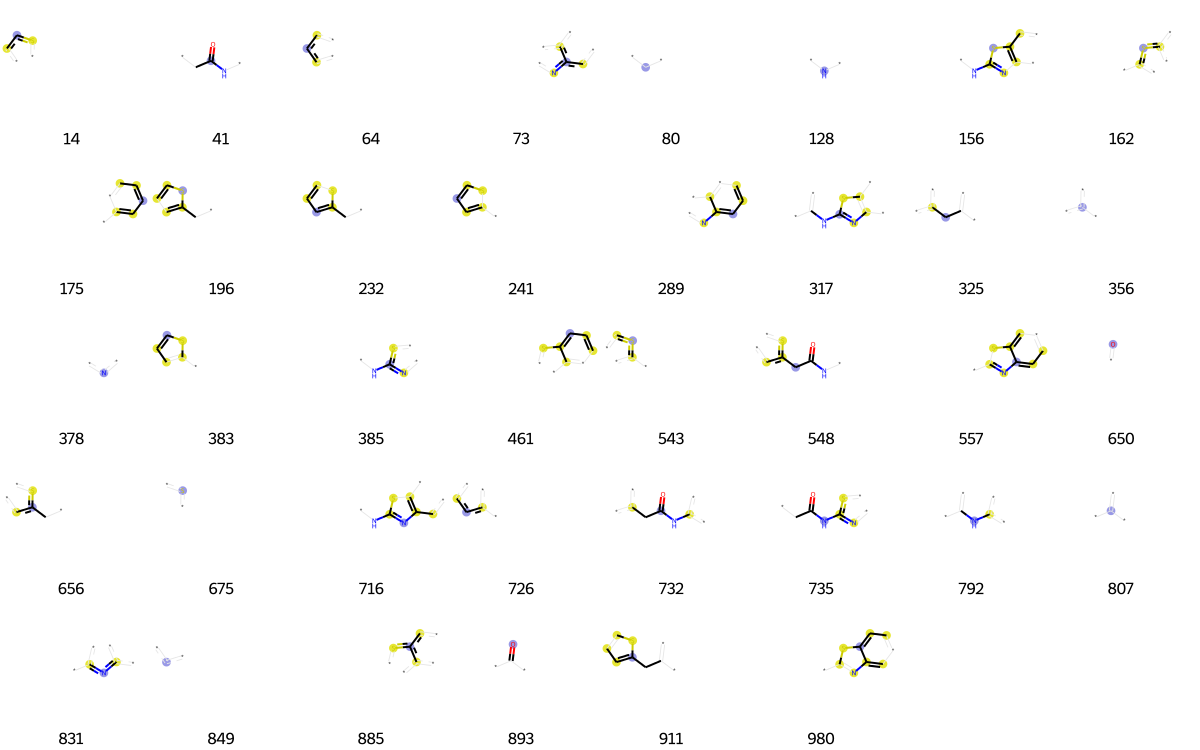

In [3987]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [3988]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[1,
 4,
 42,
 50,
 90,
 96,
 112,
 128,
 162,
 213,
 216,
 220,
 310,
 356,
 358,
 360,
 361,
 367,
 386,
 486,
 593,
 598,
 641,
 646,
 650,
 673,
 674,
 675,
 699,
 714,
 726,
 771,
 790,
 792,
 793,
 807,
 849,
 893,
 904,
 926]

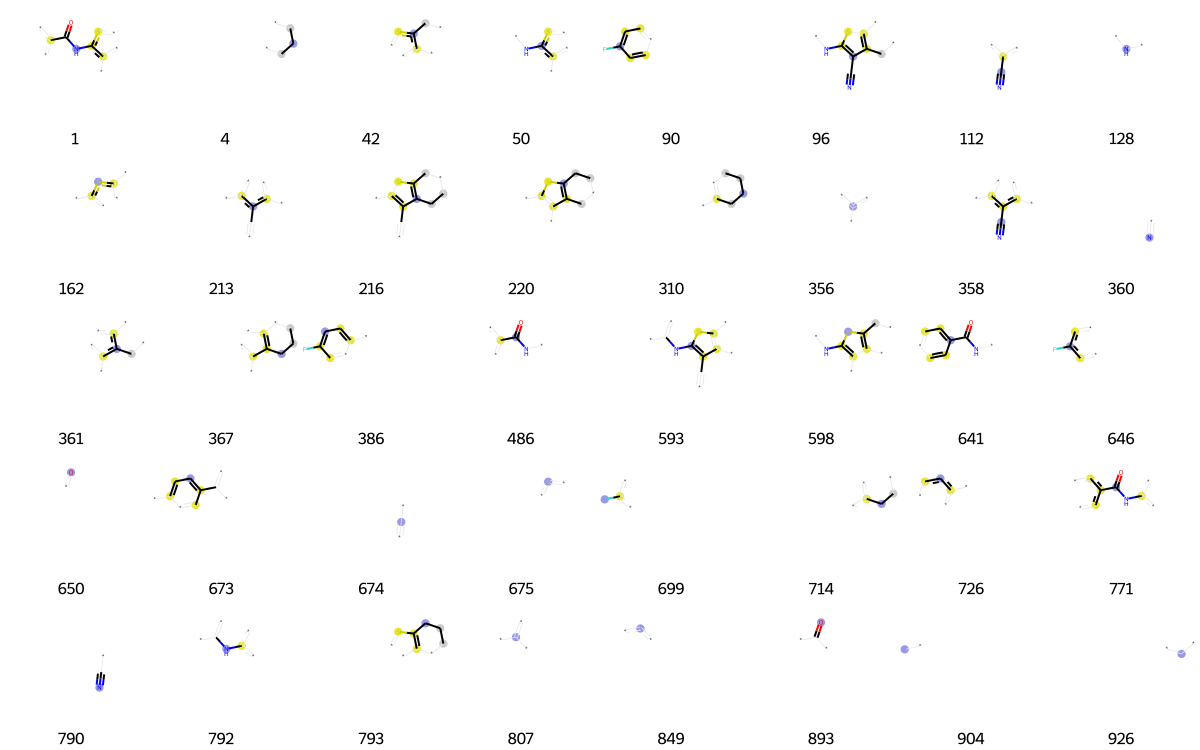

In [3989]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [3990]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[75,
 80,
 90,
 106,
 109,
 147,
 152,
 175,
 210,
 216,
 222,
 233,
 244,
 289,
 314,
 342,
 356,
 378,
 409,
 416,
 433,
 454,
 463,
 479,
 492,
 533,
 578,
 610,
 614,
 621,
 650,
 656,
 664,
 672,
 694,
 740,
 756,
 771,
 796,
 802,
 807,
 814,
 820,
 831,
 867,
 897,
 935,
 940,
 1019]

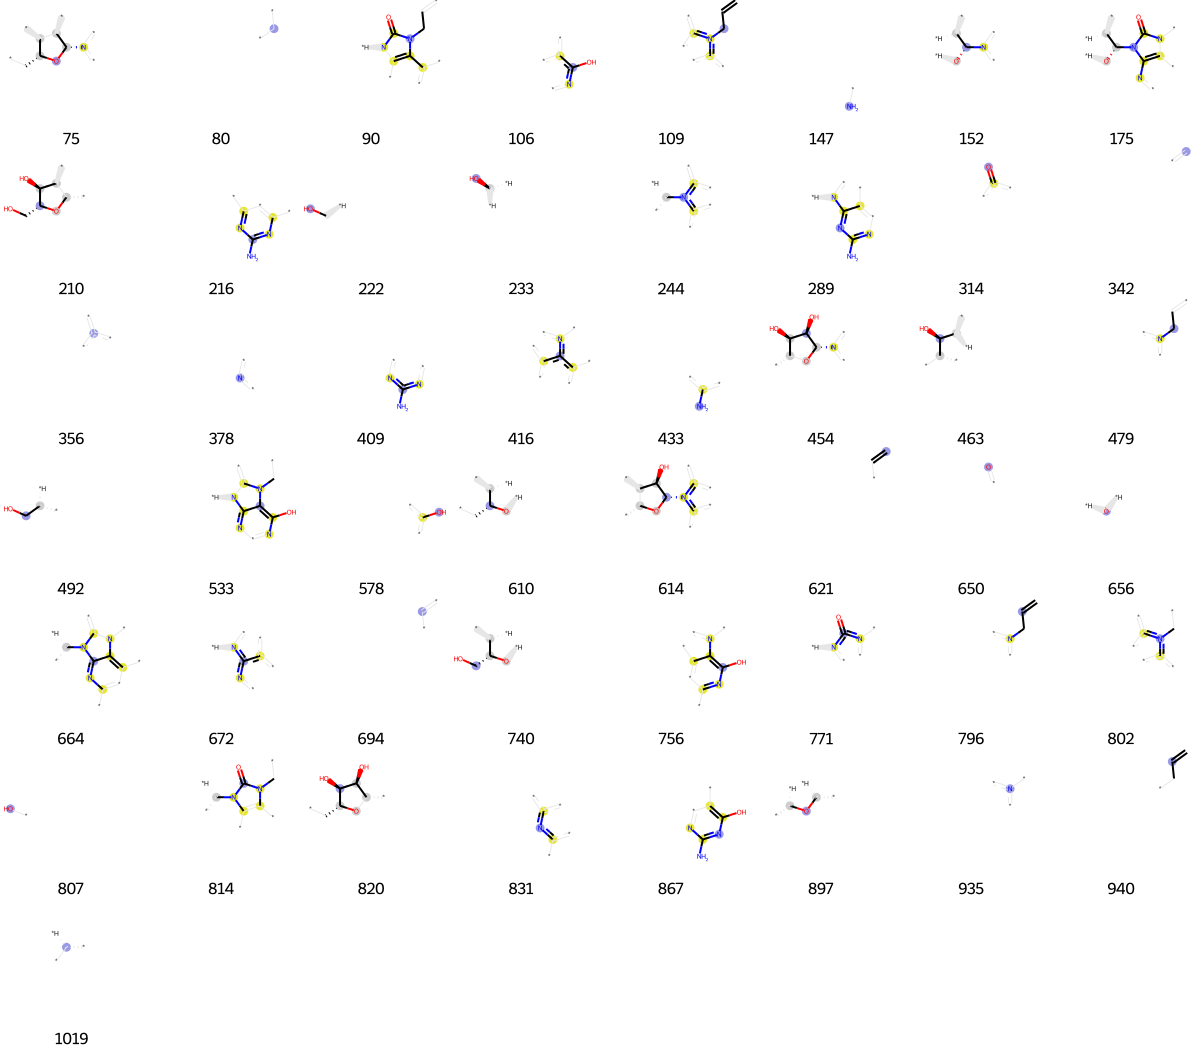

In [3991]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [3992]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[83,
 90,
 157,
 184,
 301,
 314,
 356,
 362,
 389,
 407,
 424,
 553,
 650,
 652,
 675,
 795,
 804,
 807,
 847,
 893,
 926,
 1019]

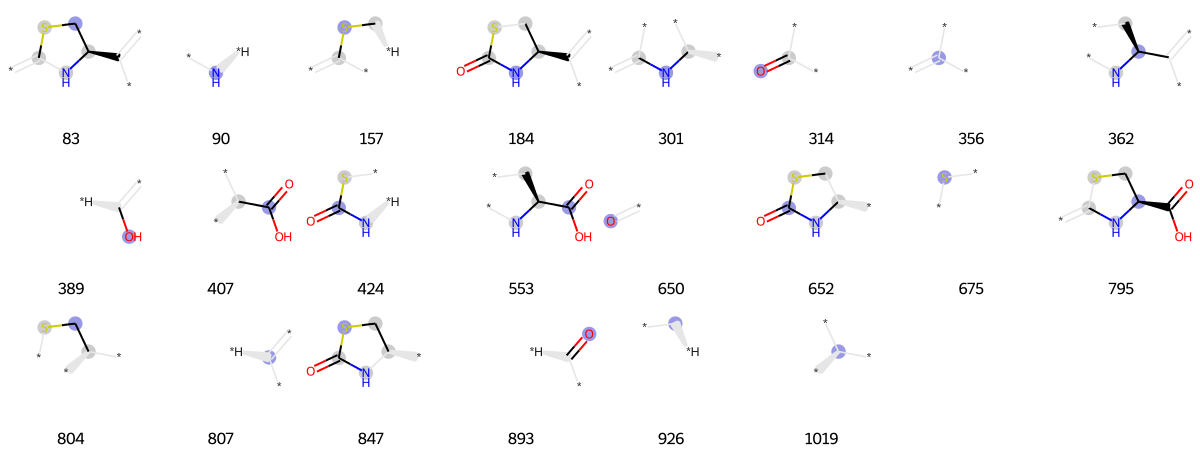

In [3993]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [3994]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[33,
 80,
 90,
 119,
 128,
 197,
 218,
 294,
 314,
 337,
 349,
 356,
 420,
 445,
 464,
 542,
 578,
 591,
 592,
 650,
 667,
 699,
 721,
 745,
 750,
 758,
 772,
 794,
 807,
 816,
 846,
 849,
 852,
 887,
 893,
 904,
 917,
 935]

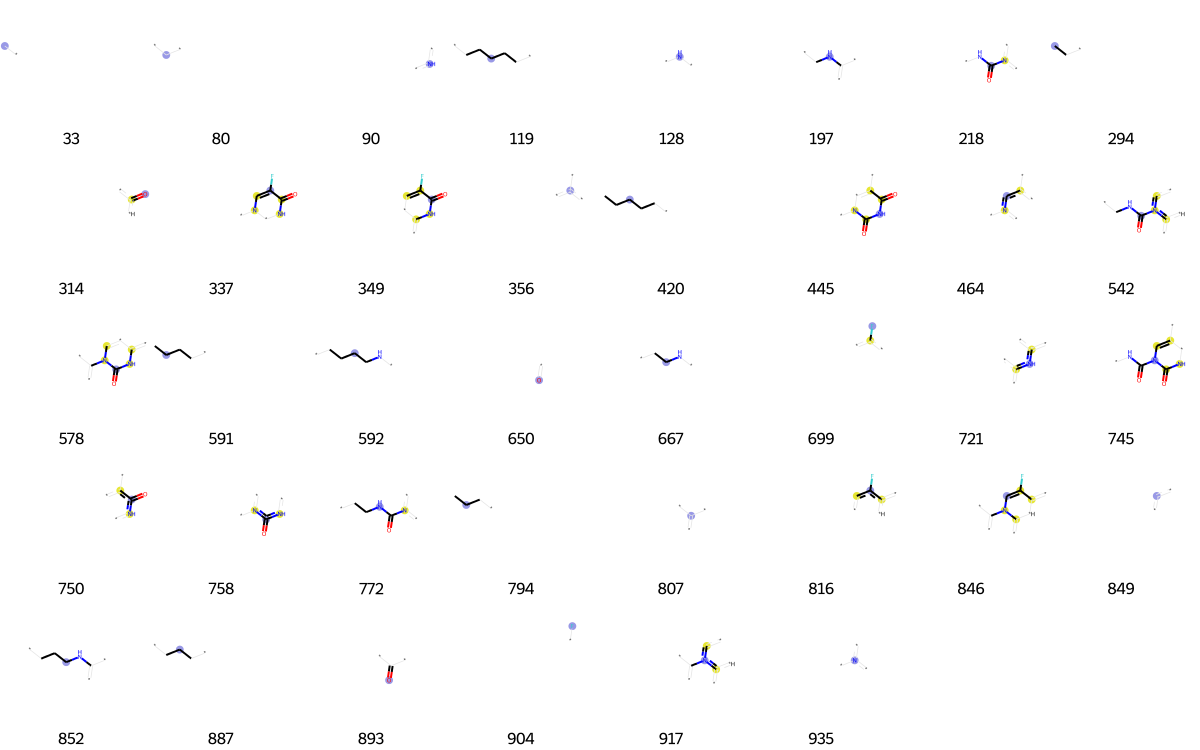

In [3995]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [3996]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[33,
 34,
 58,
 80,
 86,
 87,
 112,
 128,
 140,
 191,
 216,
 237,
 255,
 265,
 294,
 295,
 301,
 329,
 332,
 333,
 350,
 356,
 360,
 361,
 366,
 378,
 381,
 392,
 428,
 456,
 458,
 464,
 465,
 474,
 488,
 491,
 507,
 511,
 557,
 561,
 564,
 659,
 674,
 699,
 700,
 716,
 724,
 726,
 759,
 767,
 777,
 790,
 816,
 827,
 838,
 843,
 847,
 848,
 849,
 850,
 865,
 875,
 886,
 904,
 922,
 926,
 935,
 965,
 980,
 1019]

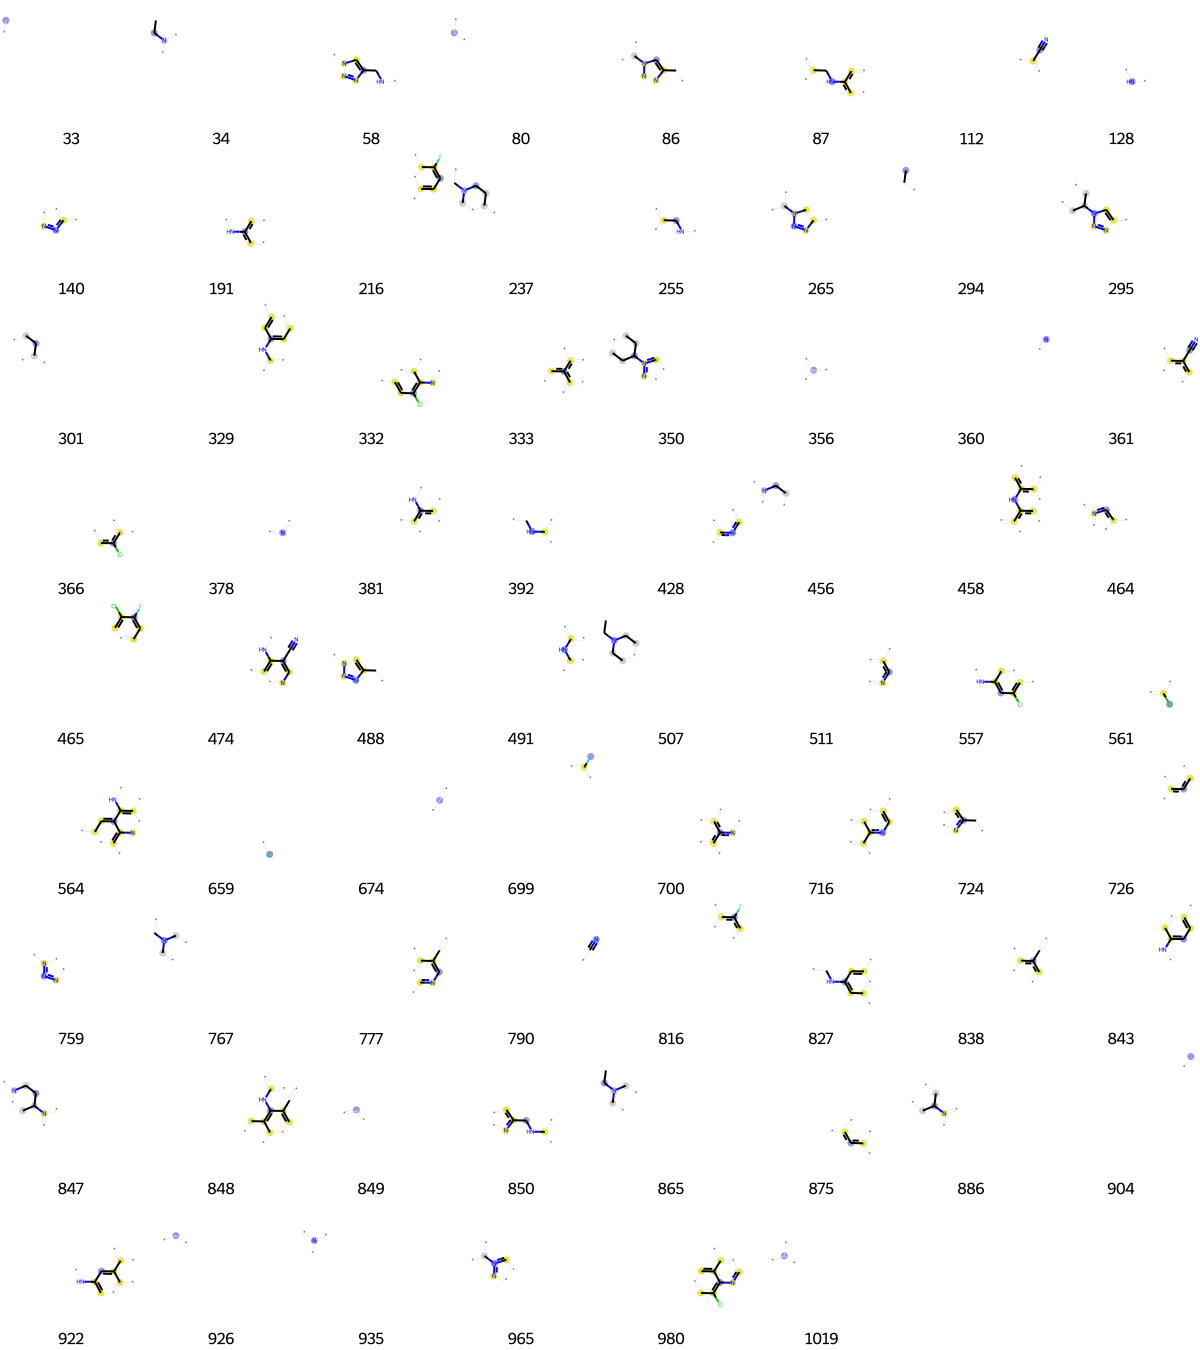

In [3997]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [3998]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[15,
 36,
 64,
 80,
 82,
 89,
 109,
 114,
 128,
 136,
 138,
 175,
 197,
 207,
 221,
 240,
 242,
 248,
 265,
 289,
 356,
 361,
 362,
 378,
 381,
 389,
 429,
 432,
 483,
 486,
 510,
 518,
 523,
 526,
 543,
 551,
 552,
 635,
 650,
 656,
 672,
 675,
 703,
 723,
 726,
 736,
 800,
 806,
 807,
 809,
 831,
 849,
 875,
 886,
 893,
 904,
 926,
 947,
 950,
 961,
 980,
 989]

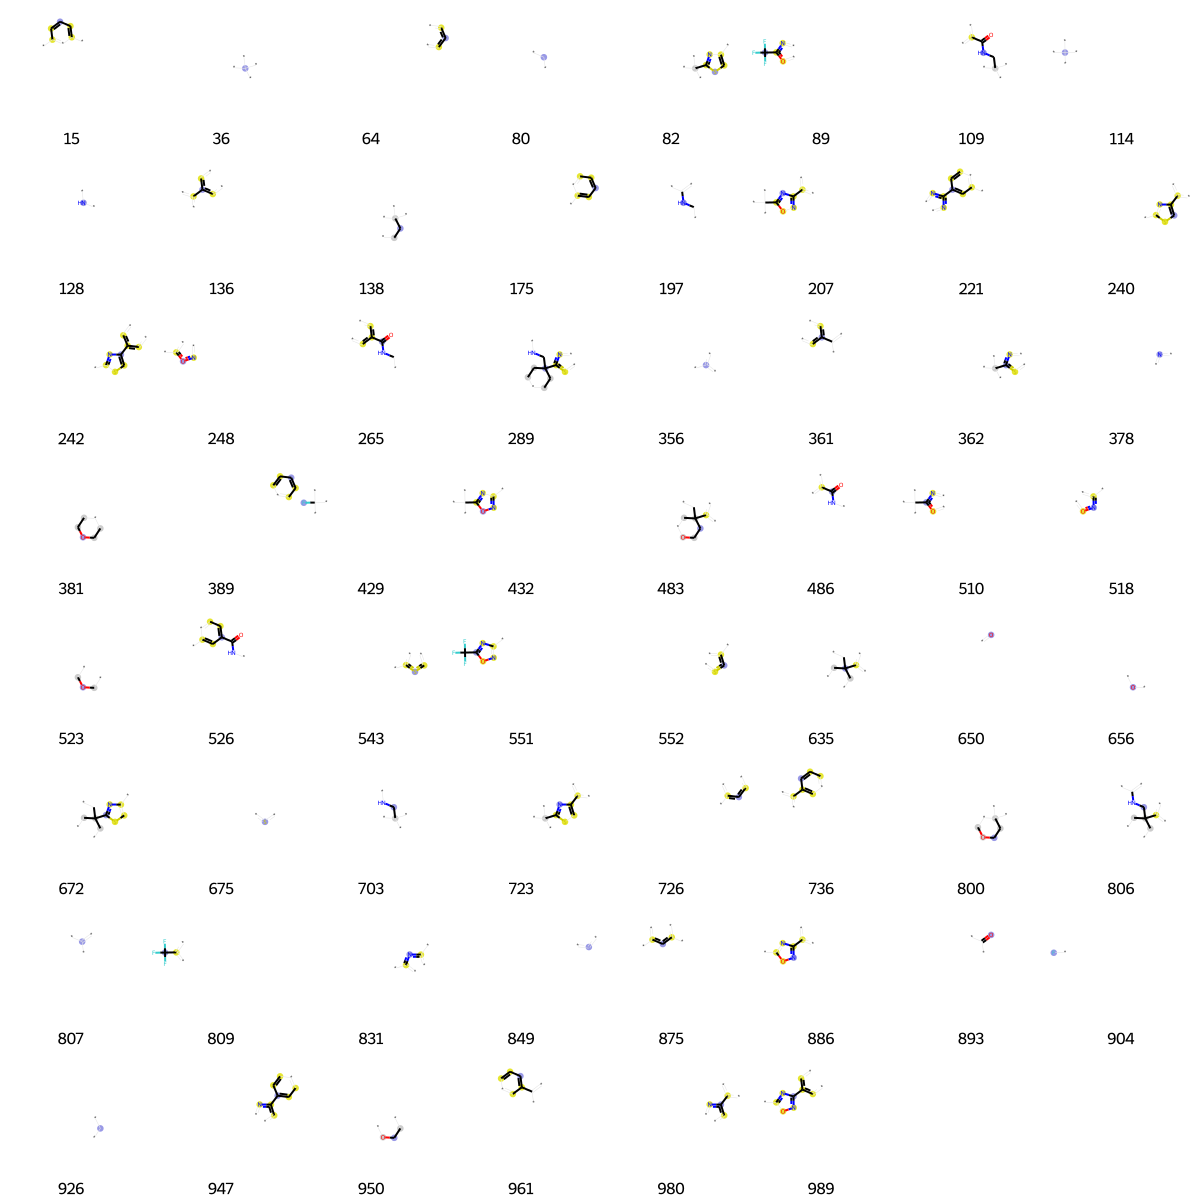

In [3999]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [4000]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[1,
 46,
 64,
 77,
 80,
 90,
 95,
 117,
 118,
 119,
 128,
 175,
 181,
 216,
 270,
 291,
 310,
 314,
 322,
 341,
 356,
 389,
 421,
 423,
 428,
 431,
 441,
 455,
 477,
 486,
 494,
 504,
 515,
 531,
 557,
 609,
 622,
 650,
 695,
 699,
 707,
 718,
 721,
 726,
 730,
 735,
 741,
 744,
 768,
 807,
 816,
 827,
 849,
 875,
 893,
 904,
 915,
 917,
 935,
 938,
 967,
 980,
 982]

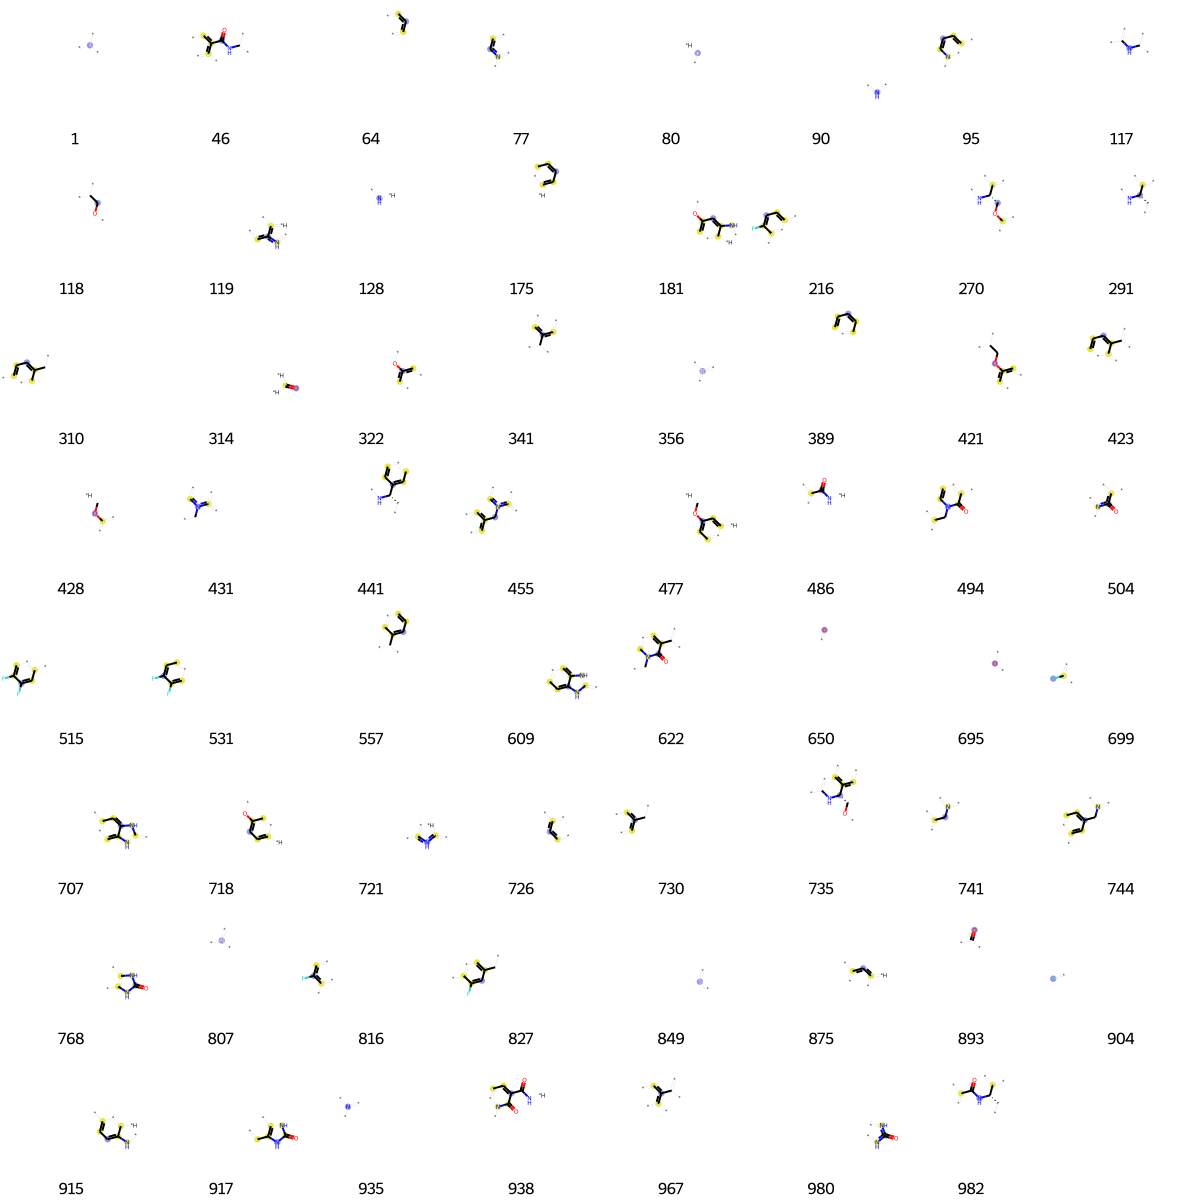

In [4001]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [4002]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[15,
 61,
 62,
 64,
 75,
 80,
 104,
 106,
 128,
 136,
 165,
 191,
 216,
 222,
 329,
 356,
 378,
 392,
 399,
 428,
 456,
 458,
 473,
 491,
 532,
 552,
 558,
 561,
 562,
 592,
 659,
 667,
 680,
 703,
 726,
 787,
 795,
 806,
 807,
 831,
 842,
 849,
 875,
 887,
 948,
 980,
 993,
 1012]

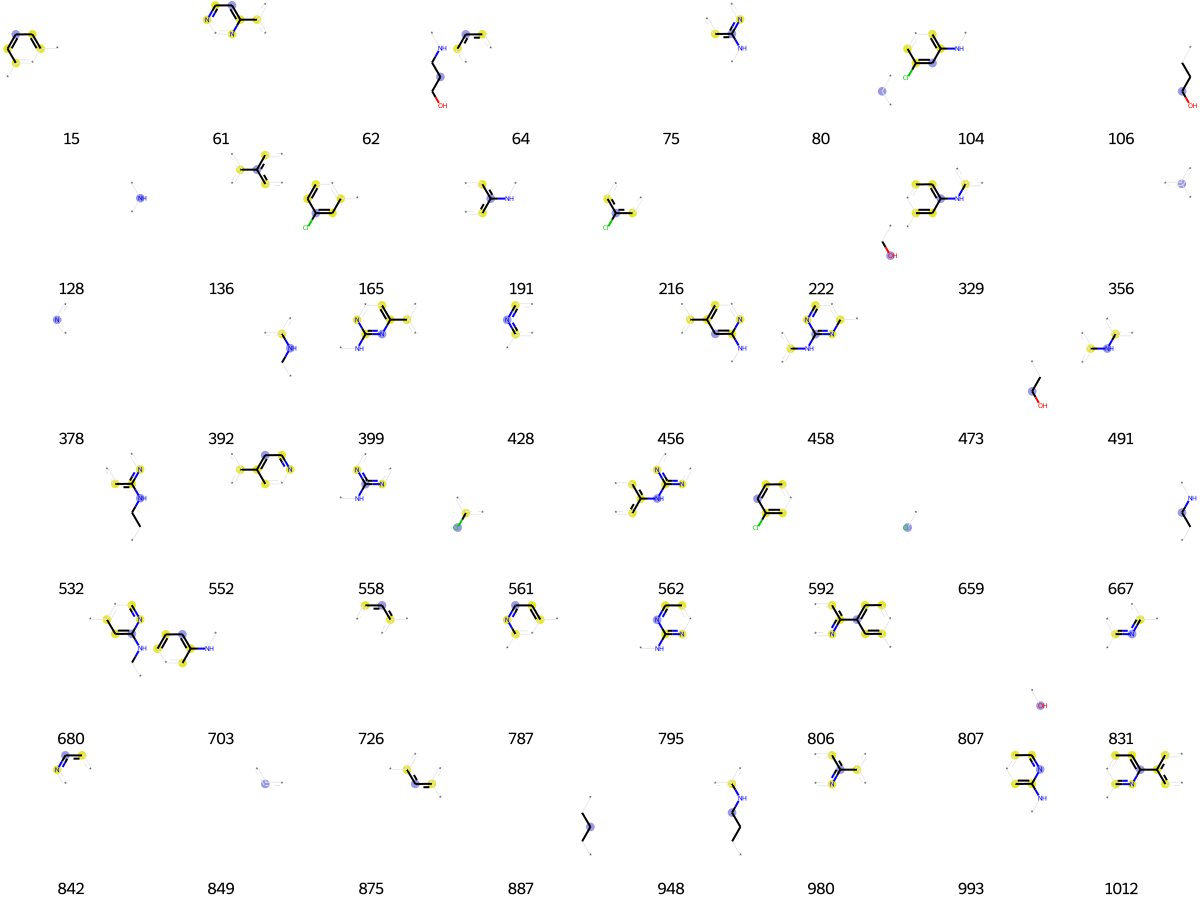

In [4004]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [4005]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[1,
 3,
 13,
 33,
 79,
 80,
 87,
 94,
 114,
 118,
 128,
 140,
 147,
 157,
 165,
 197,
 227,
 249,
 283,
 289,
 310,
 356,
 392,
 404,
 428,
 467,
 486,
 487,
 494,
 507,
 510,
 512,
 573,
 630,
 650,
 680,
 695,
 709,
 722,
 726,
 729,
 730,
 747,
 749,
 756,
 764,
 780,
 786,
 792,
 807,
 841,
 849,
 875,
 882,
 887,
 888,
 893,
 907,
 946,
 966,
 995,
 1005,
 1009]

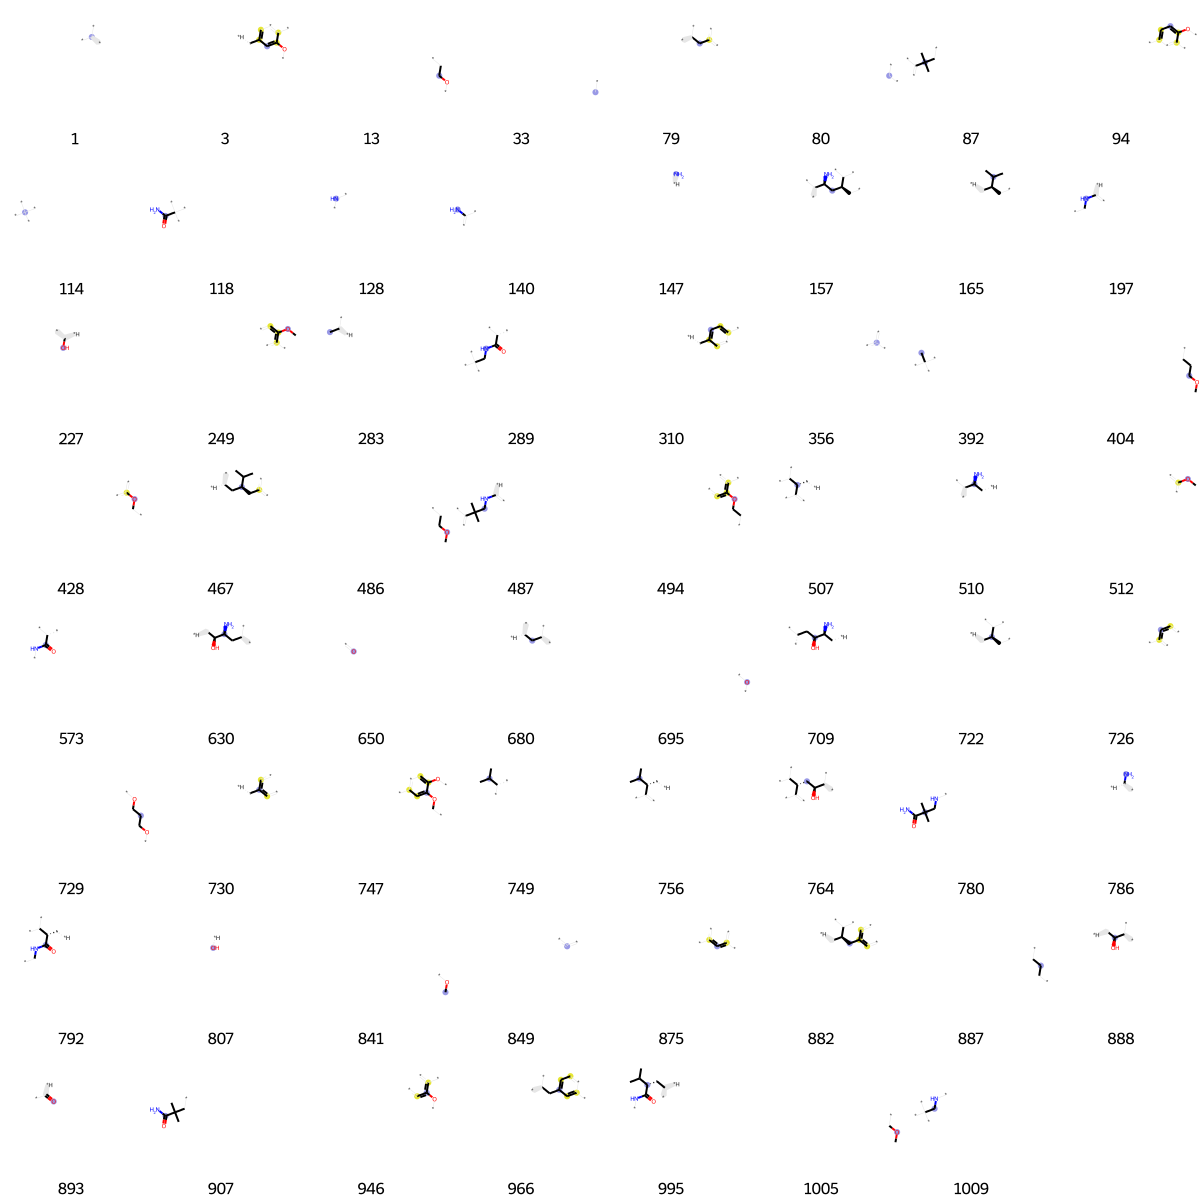

In [4006]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [4007]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[42,
 64,
 80,
 97,
 154,
 175,
 211,
 235,
 291,
 339,
 356,
 372,
 389,
 674,
 725,
 726,
 730,
 849,
 865,
 914]

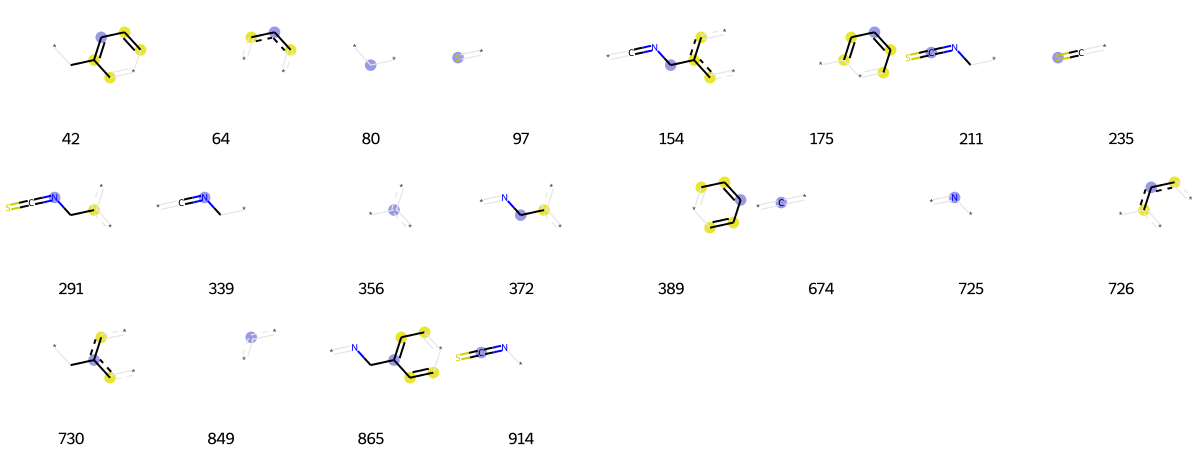

In [4008]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [4009]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[33,
 53,
 79,
 113,
 114,
 128,
 186,
 191,
 236,
 258,
 356,
 360,
 383,
 389,
 393,
 429,
 532,
 641,
 650,
 674,
 681,
 704,
 726,
 745,
 790,
 792,
 803,
 807,
 809,
 843,
 849,
 893,
 904,
 1017]

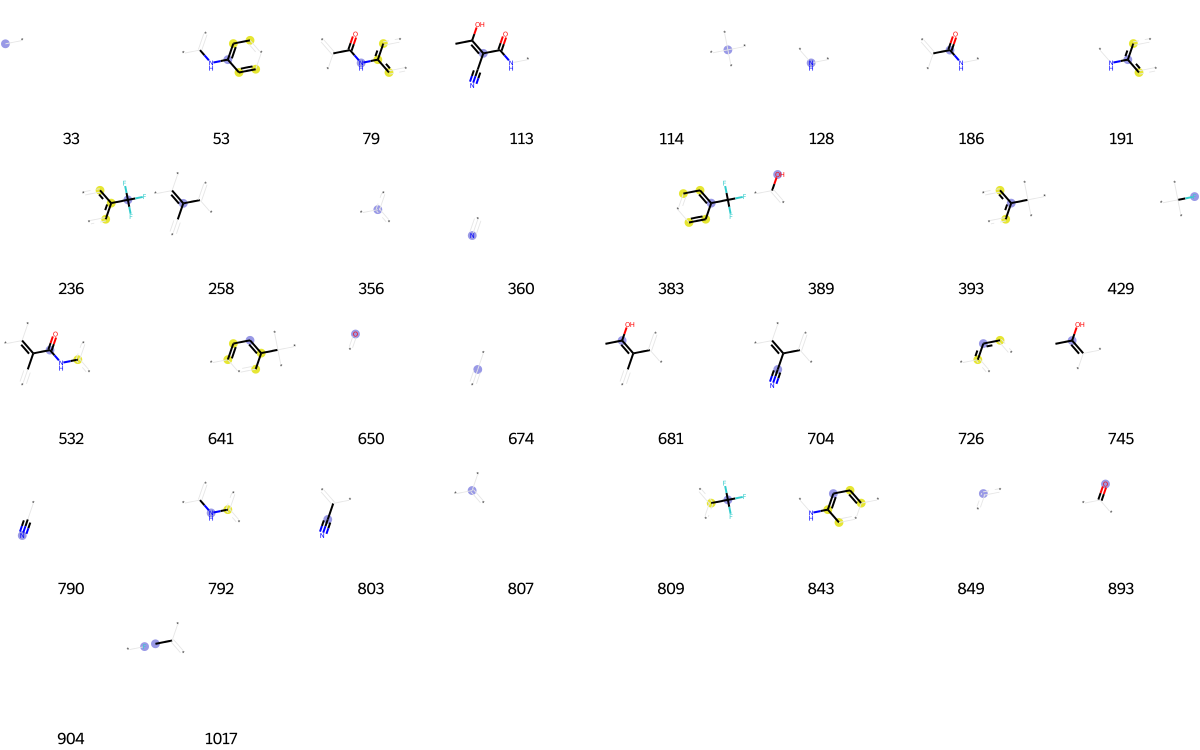

In [4010]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [4011]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[2,
 4,
 33,
 36,
 80,
 104,
 114,
 138,
 225,
 294,
 295,
 317,
 322,
 356,
 389,
 392,
 473,
 484,
 537,
 548,
 556,
 614,
 650,
 673,
 676,
 695,
 718,
 726,
 807,
 849,
 856,
 893,
 926,
 943,
 953,
 1022]

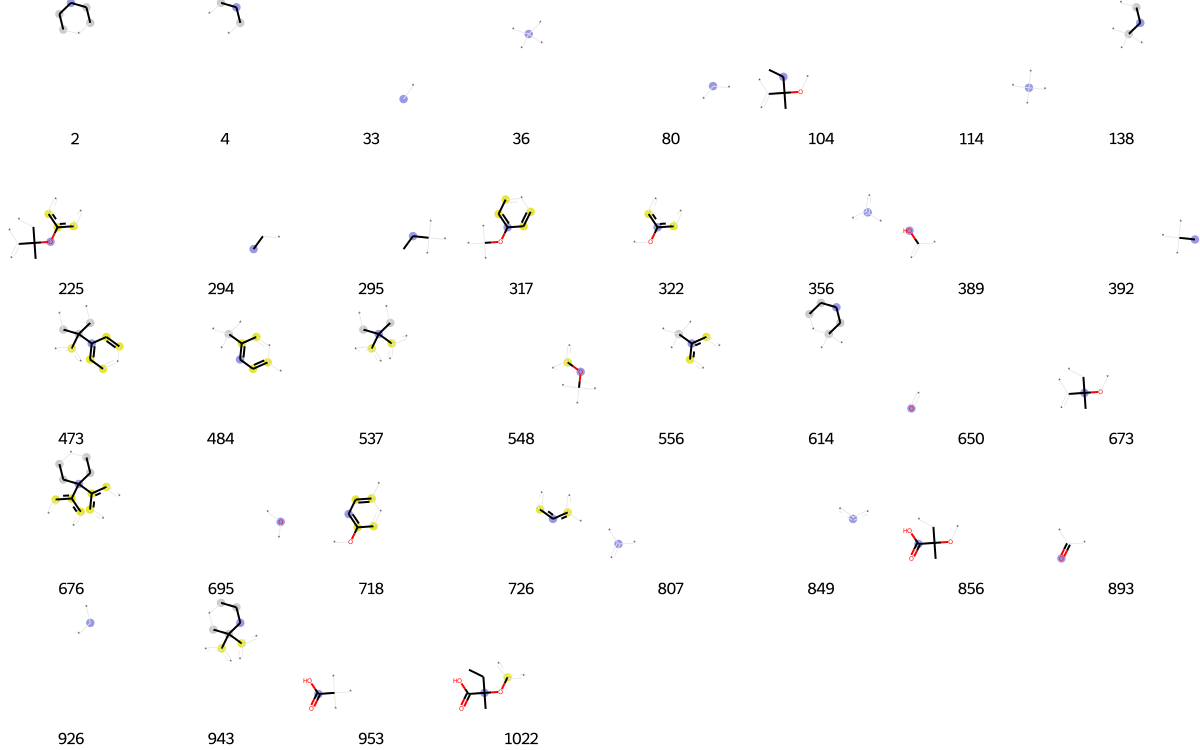

In [4012]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [4013]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[1,
 16,
 33,
 42,
 64,
 68,
 79,
 80,
 114,
 117,
 123,
 128,
 131,
 136,
 175,
 227,
 310,
 335,
 339,
 356,
 375,
 378,
 389,
 392,
 419,
 428,
 431,
 448,
 483,
 507,
 539,
 573,
 650,
 653,
 683,
 692,
 695,
 726,
 730,
 734,
 737,
 747,
 749,
 802,
 807,
 827,
 833,
 836,
 837,
 841,
 842,
 847,
 849,
 857,
 881,
 888,
 893,
 896,
 947,
 961,
 980,
 993,
 1003]

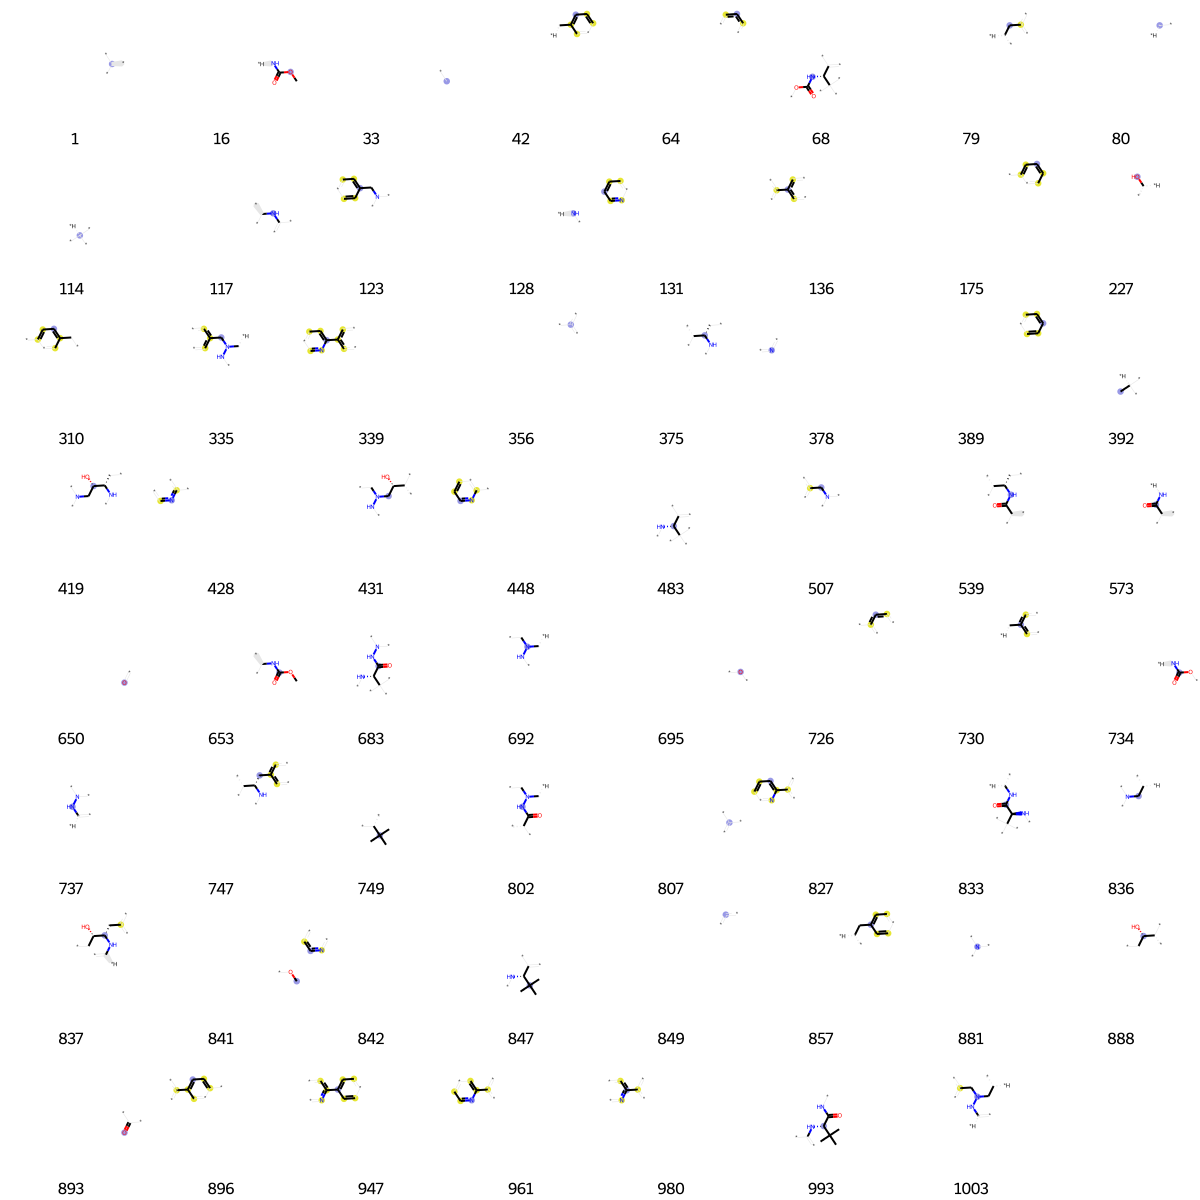

In [4014]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [4015]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[4,
 8,
 11,
 33,
 36,
 59,
 64,
 77,
 83,
 90,
 102,
 202,
 215,
 225,
 233,
 250,
 252,
 258,
 260,
 270,
 272,
 284,
 285,
 297,
 301,
 314,
 328,
 350,
 356,
 376,
 402,
 410,
 440,
 456,
 462,
 463,
 489,
 521,
 527,
 529,
 551,
 558,
 564,
 566,
 574,
 578,
 590,
 594,
 610,
 633,
 637,
 650,
 656,
 660,
 694,
 695,
 698,
 707,
 712,
 723,
 725,
 740,
 744,
 756,
 772,
 781,
 801,
 807,
 830,
 841,
 847,
 849,
 861,
 862,
 864,
 884,
 886,
 890,
 893,
 911,
 913,
 926,
 932,
 933,
 935,
 937,
 945,
 960,
 966,
 969,
 995,
 1017,
 1019,
 1021]

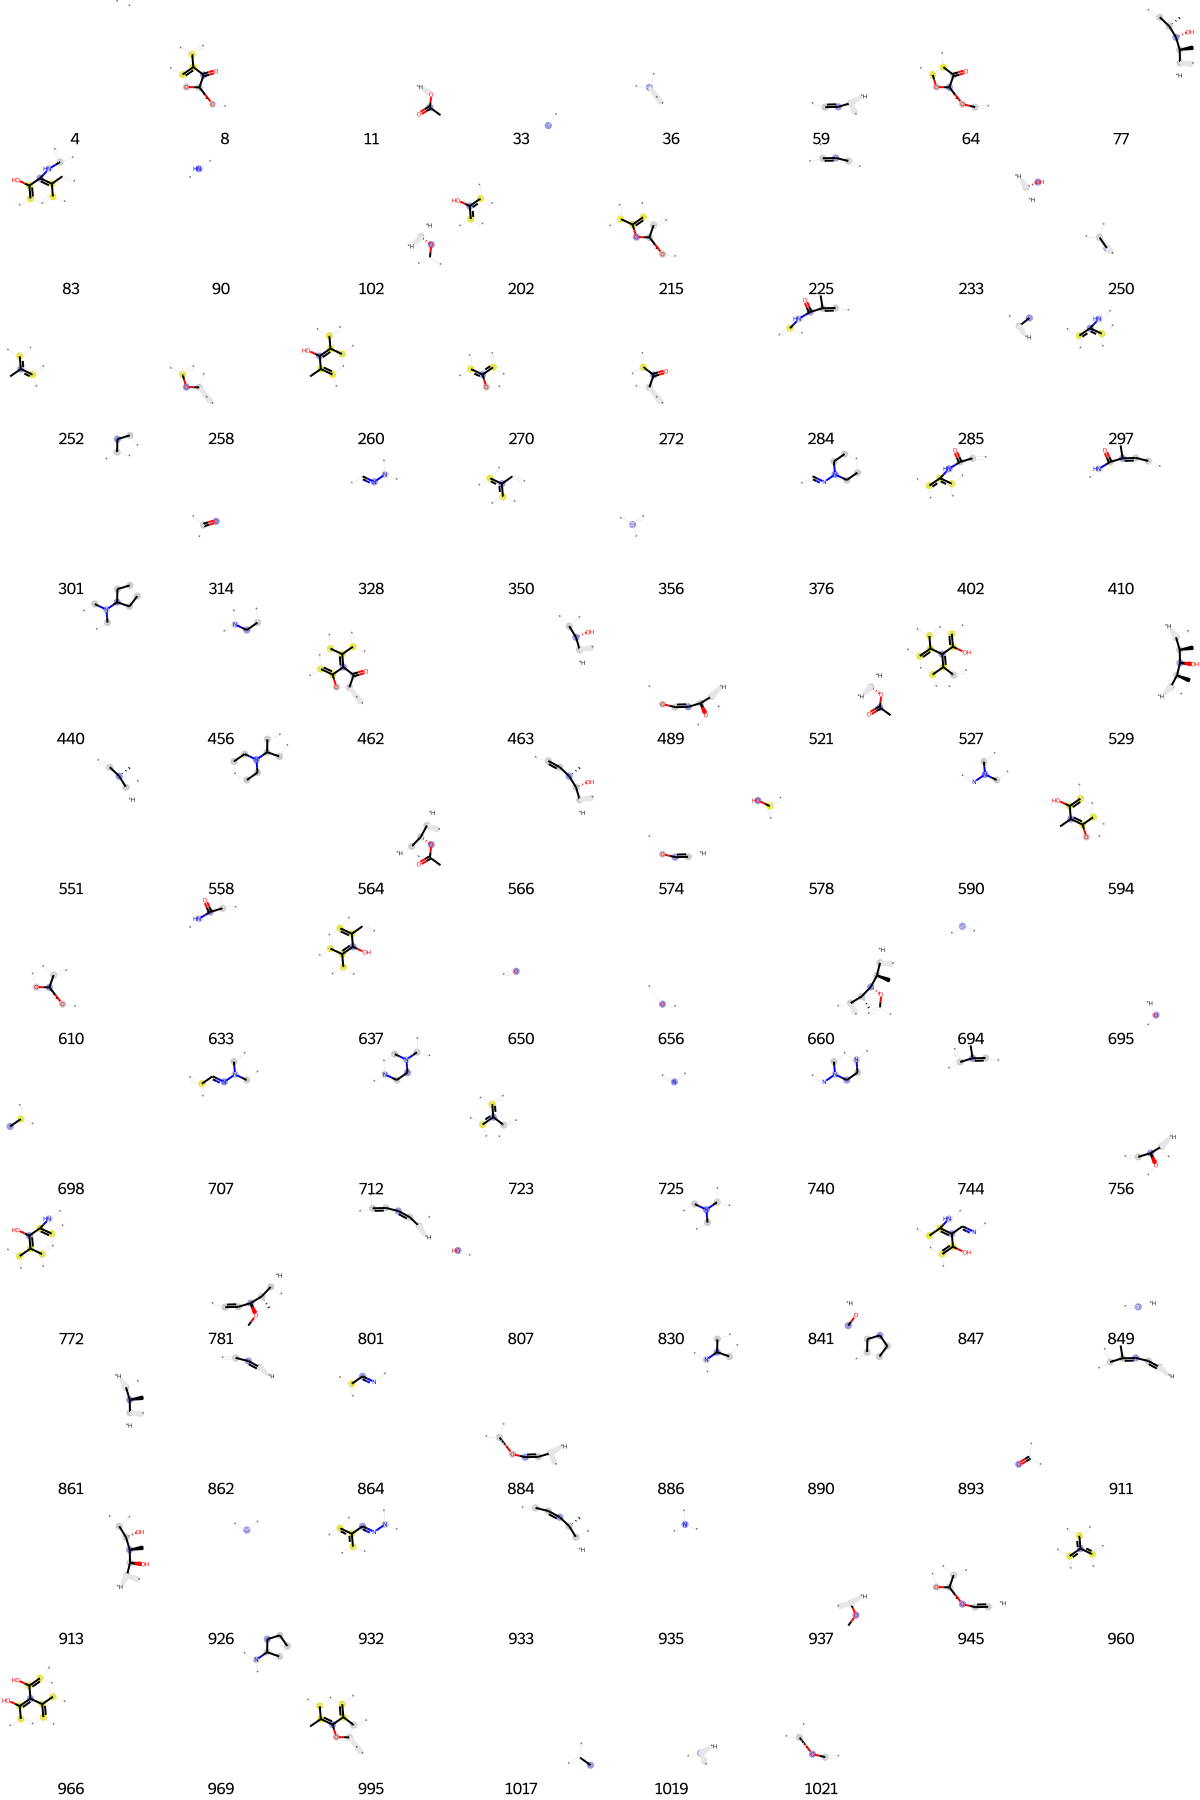

In [4016]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [4017]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[33,
 35,
 45,
 46,
 60,
 63,
 64,
 73,
 80,
 85,
 87,
 114,
 116,
 171,
 175,
 203,
 215,
 216,
 225,
 230,
 240,
 289,
 310,
 322,
 333,
 335,
 341,
 350,
 356,
 378,
 389,
 392,
 422,
 428,
 444,
 477,
 561,
 588,
 650,
 654,
 659,
 672,
 692,
 695,
 718,
 724,
 726,
 730,
 741,
 745,
 759,
 802,
 807,
 810,
 816,
 831,
 849,
 875,
 876,
 888,
 893,
 927,
 935,
 950,
 953,
 997]

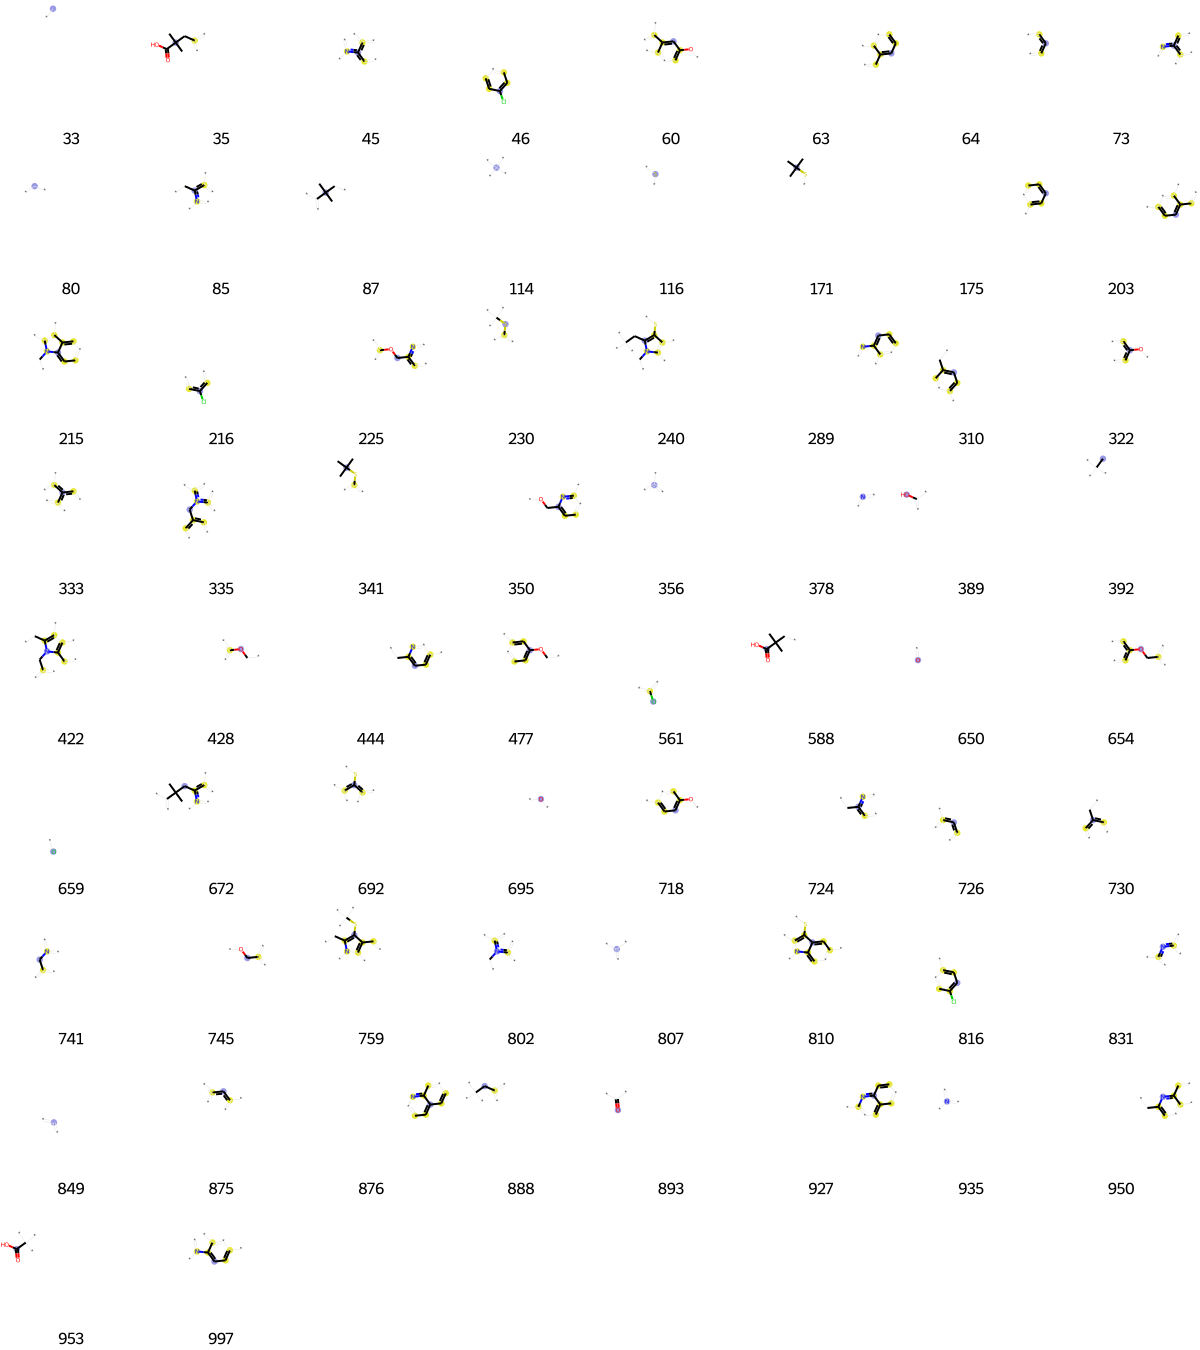

In [4018]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [4019]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[1,
 11,
 33,
 64,
 127,
 131,
 175,
 322,
 325,
 341,
 356,
 378,
 422,
 428,
 448,
 501,
 567,
 650,
 695,
 705,
 706,
 718,
 726,
 751,
 807,
 829,
 842,
 845,
 849,
 893,
 924,
 1002,
 1017]

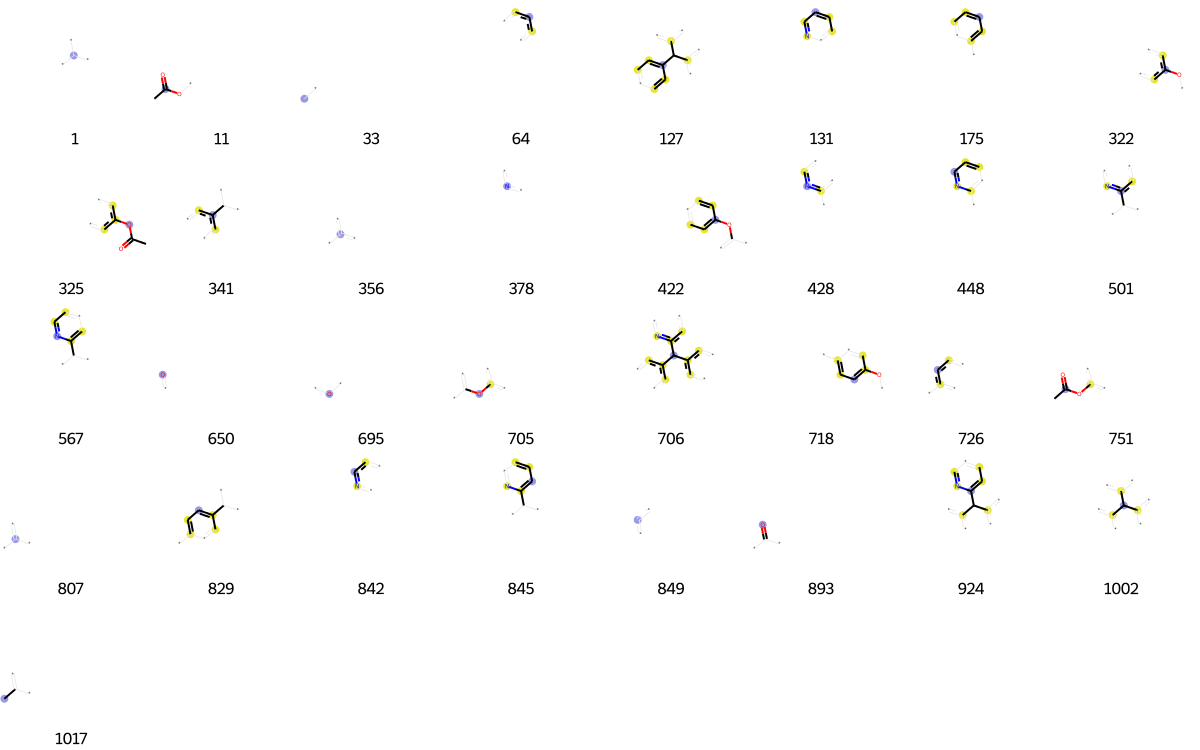

In [4020]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [4021]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[0,
 11,
 33,
 45,
 80,
 114,
 129,
 140,
 147,
 151,
 162,
 203,
 275,
 284,
 294,
 295,
 301,
 309,
 318,
 335,
 350,
 356,
 359,
 378,
 382,
 402,
 406,
 407,
 419,
 429,
 433,
 452,
 456,
 484,
 511,
 527,
 569,
 650,
 675,
 692,
 781,
 807,
 816,
 818,
 831,
 849,
 875,
 893,
 904,
 926,
 935,
 960,
 963,
 987,
 989,
 1019]

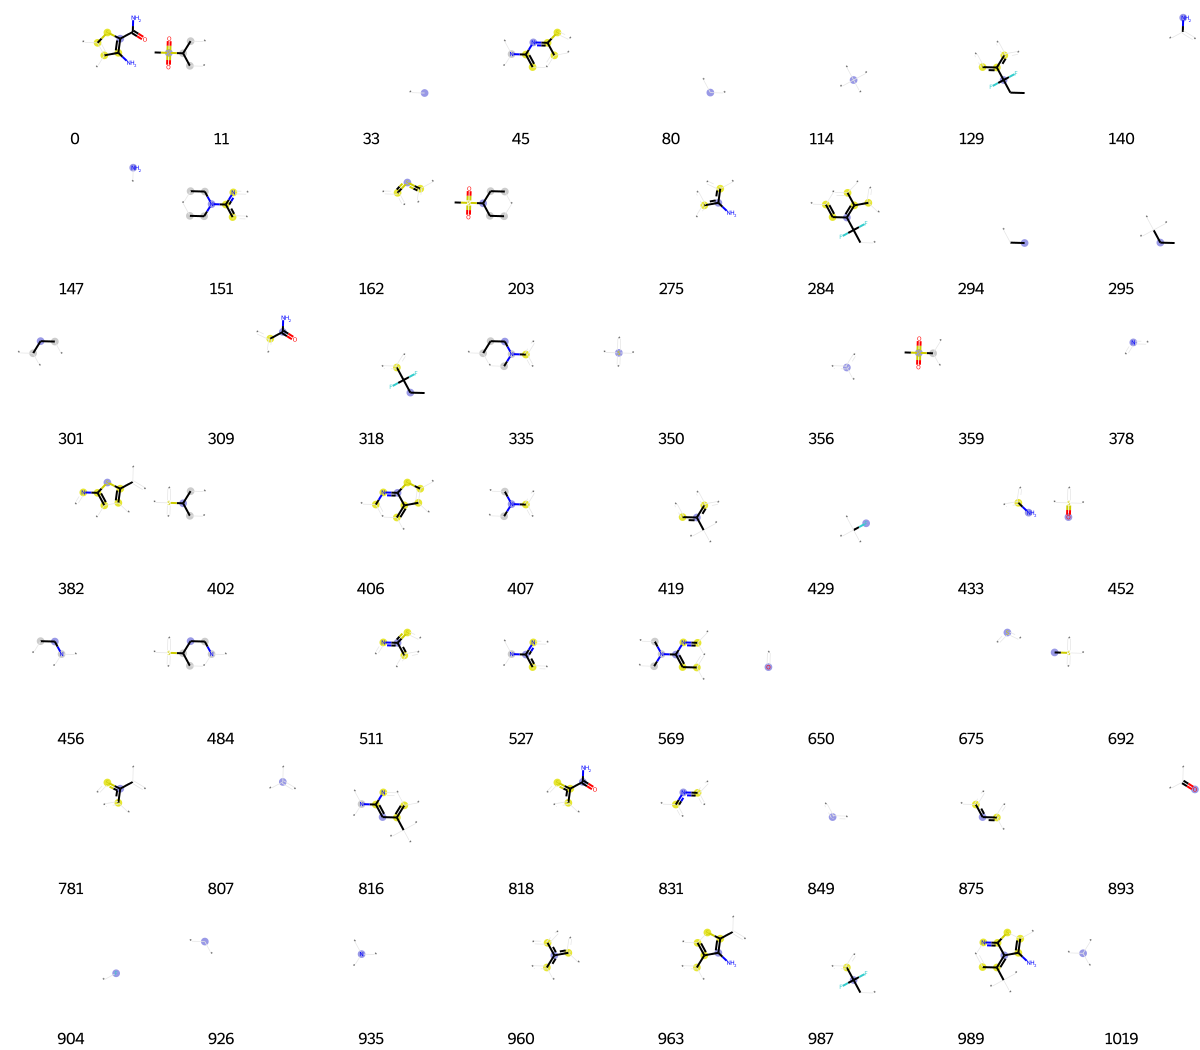

In [4022]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [4023]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[15,
 33,
 42,
 45,
 64,
 73,
 80,
 128,
 147,
 151,
 175,
 218,
 232,
 249,
 255,
 261,
 289,
 333,
 356,
 357,
 378,
 386,
 389,
 392,
 433,
 485,
 506,
 512,
 548,
 549,
 638,
 695,
 700,
 708,
 726,
 730,
 763,
 764,
 831,
 841,
 849,
 933,
 935,
 946,
 964,
 969,
 980,
 1003,
 1010,
 1018]

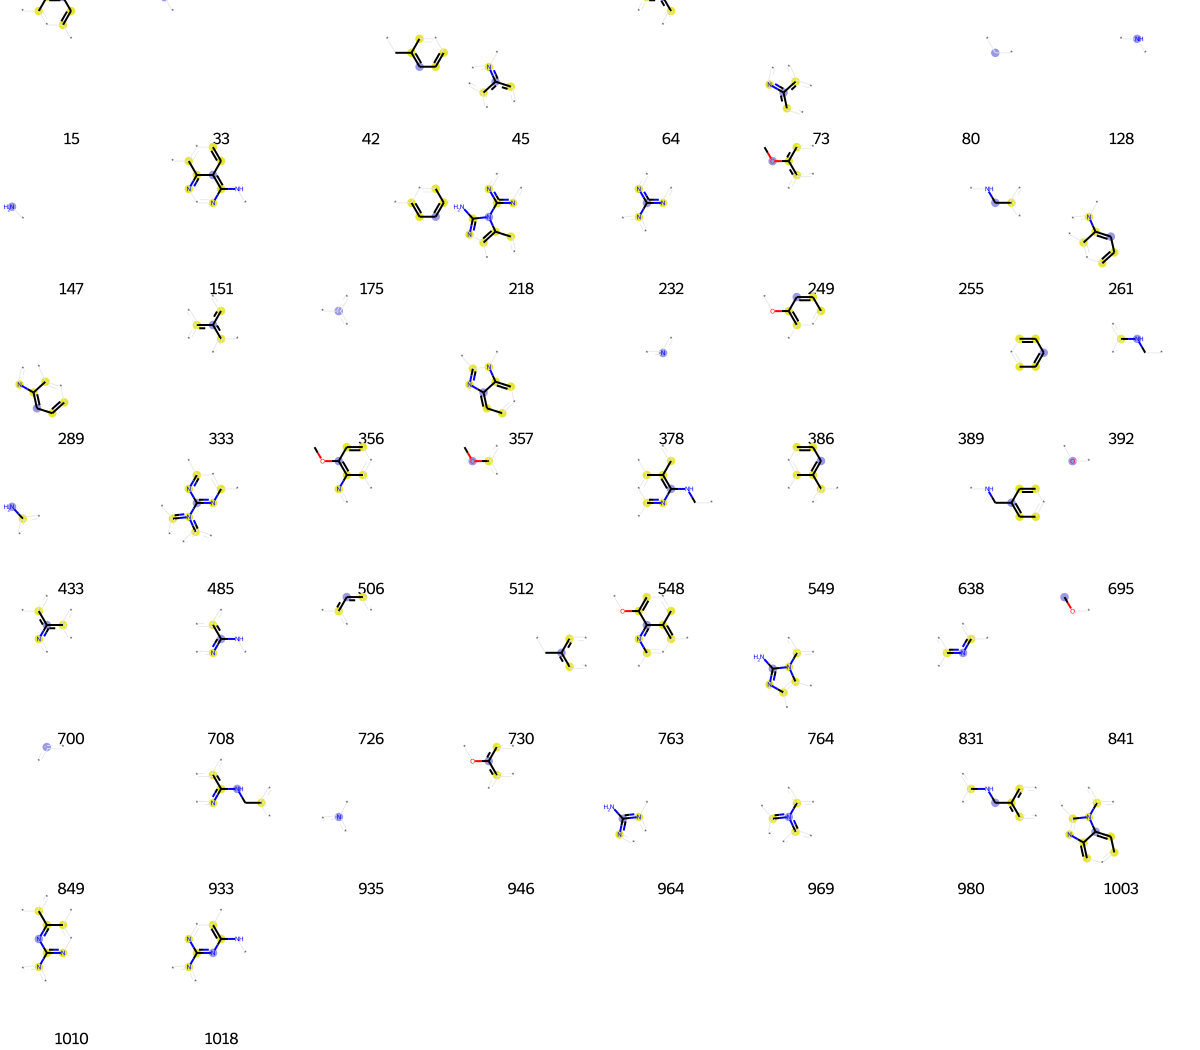

In [4024]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [4025]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[33,
 36,
 56,
 64,
 71,
 74,
 80,
 81,
 90,
 114,
 125,
 128,
 139,
 162,
 175,
 191,
 212,
 255,
 262,
 314,
 325,
 329,
 338,
 342,
 350,
 356,
 370,
 378,
 392,
 402,
 419,
 428,
 429,
 452,
 457,
 458,
 478,
 491,
 511,
 540,
 544,
 551,
 558,
 562,
 573,
 622,
 650,
 653,
 678,
 692,
 698,
 702,
 708,
 726,
 786,
 809,
 831,
 843,
 849,
 875,
 881,
 904,
 926,
 933,
 940,
 958,
 994]

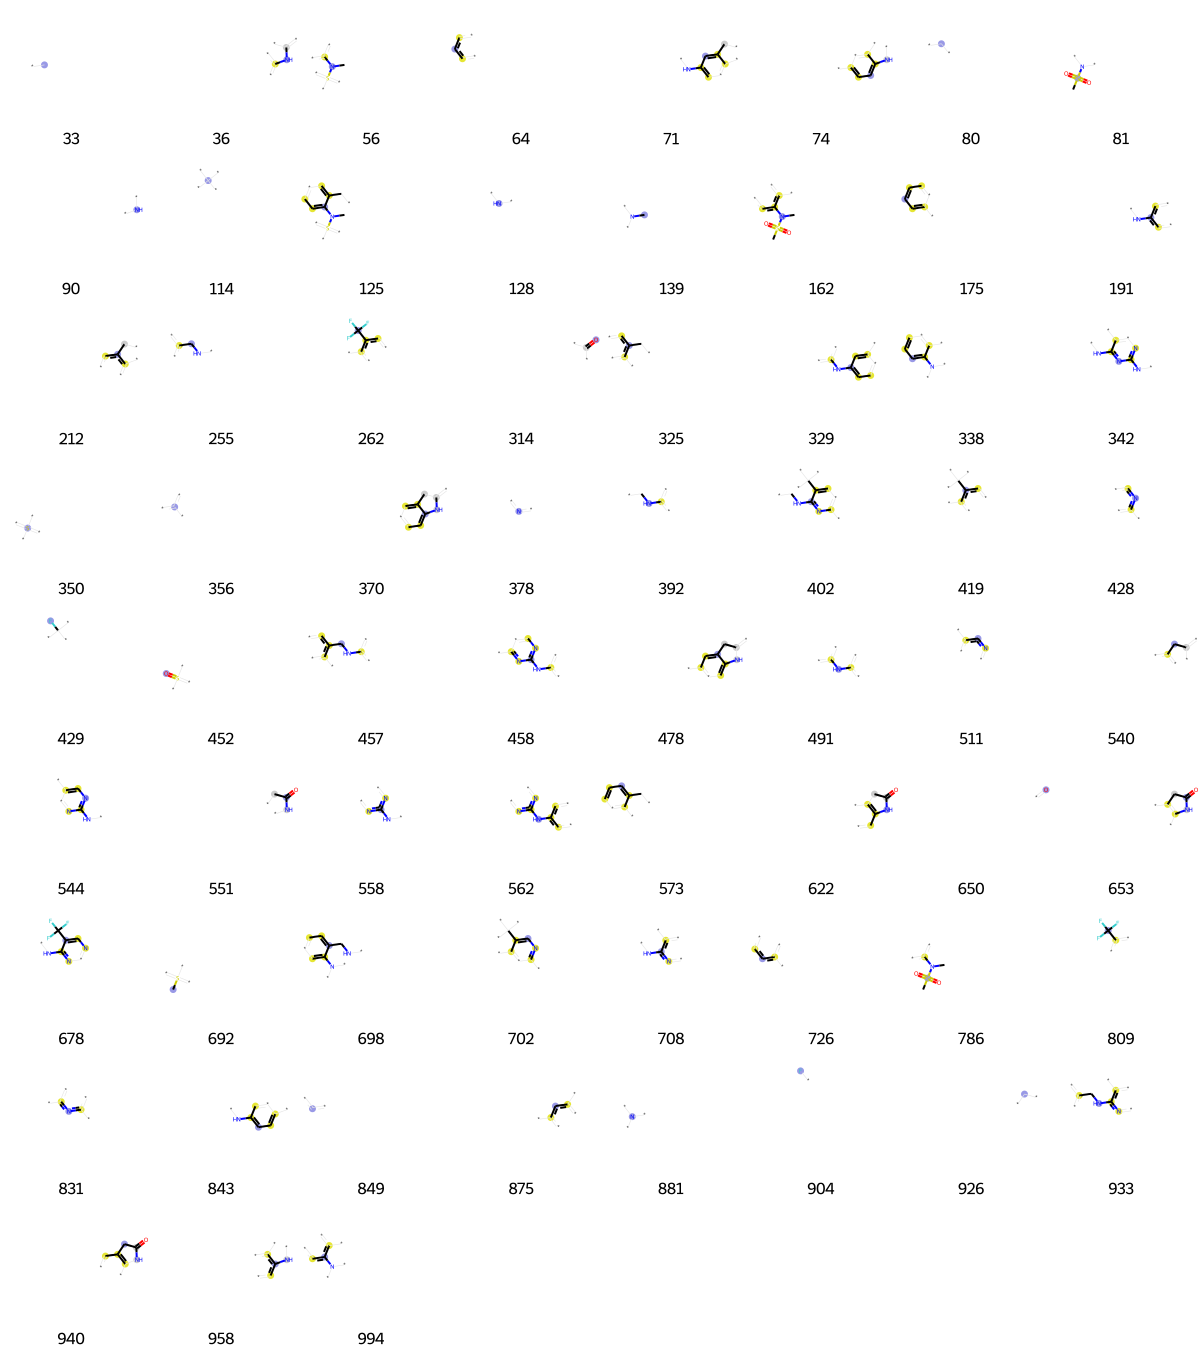

In [4026]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [4027]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[1,
 3,
 6,
 11,
 15,
 33,
 36,
 38,
 53,
 121,
 122,
 157,
 180,
 212,
 231,
 250,
 258,
 270,
 289,
 356,
 366,
 381,
 441,
 547,
 578,
 583,
 656,
 726,
 745,
 787,
 790,
 807,
 825,
 849,
 861,
 875,
 881,
 896,
 899,
 909,
 926,
 956,
 976,
 1019,
 1021]

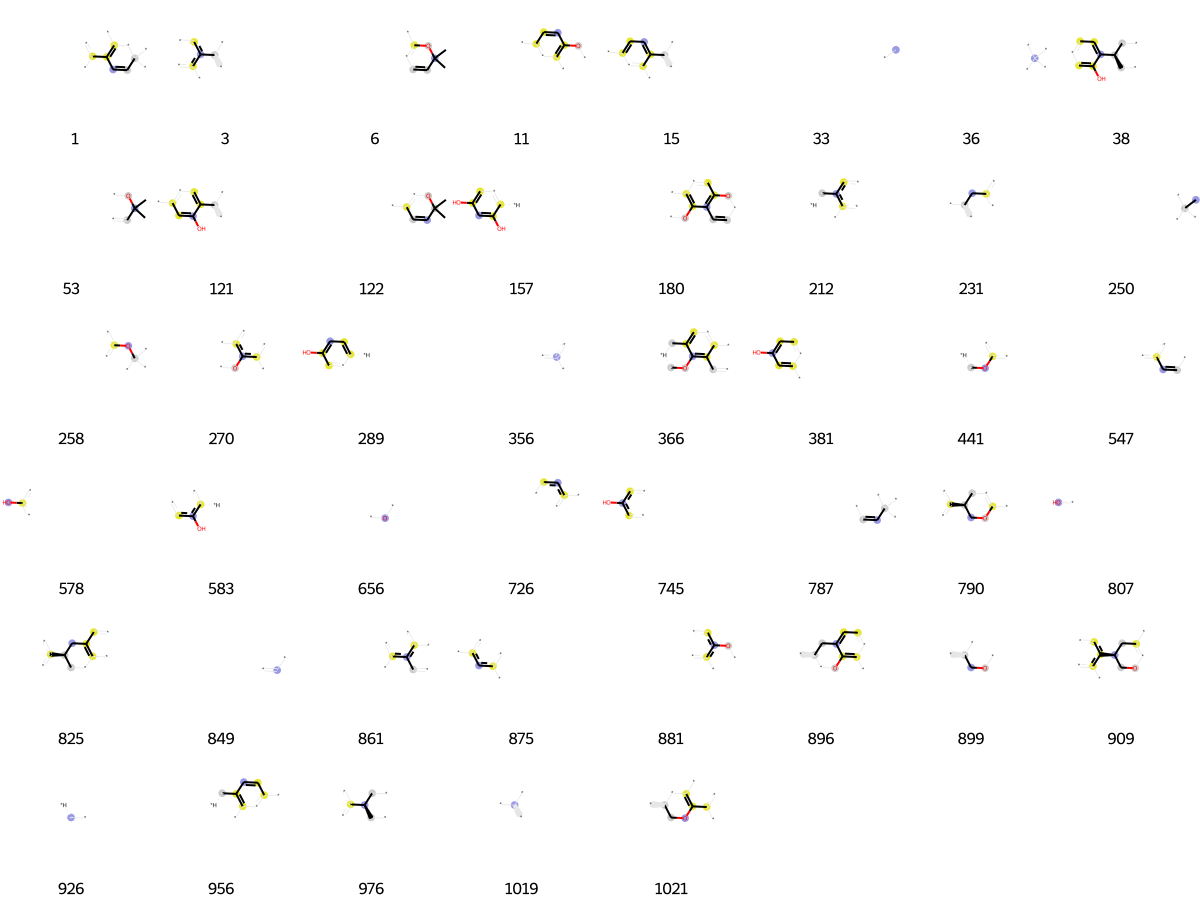

In [4028]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [4029]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[1,
 4,
 5,
 26,
 39,
 42,
 45,
 64,
 79,
 80,
 97,
 108,
 126,
 128,
 175,
 188,
 225,
 229,
 278,
 301,
 314,
 339,
 354,
 356,
 387,
 389,
 407,
 438,
 531,
 551,
 559,
 573,
 650,
 664,
 675,
 726,
 730,
 789,
 807,
 846,
 849,
 857,
 893,
 917,
 926,
 935,
 945,
 955,
 976,
 998,
 1019]

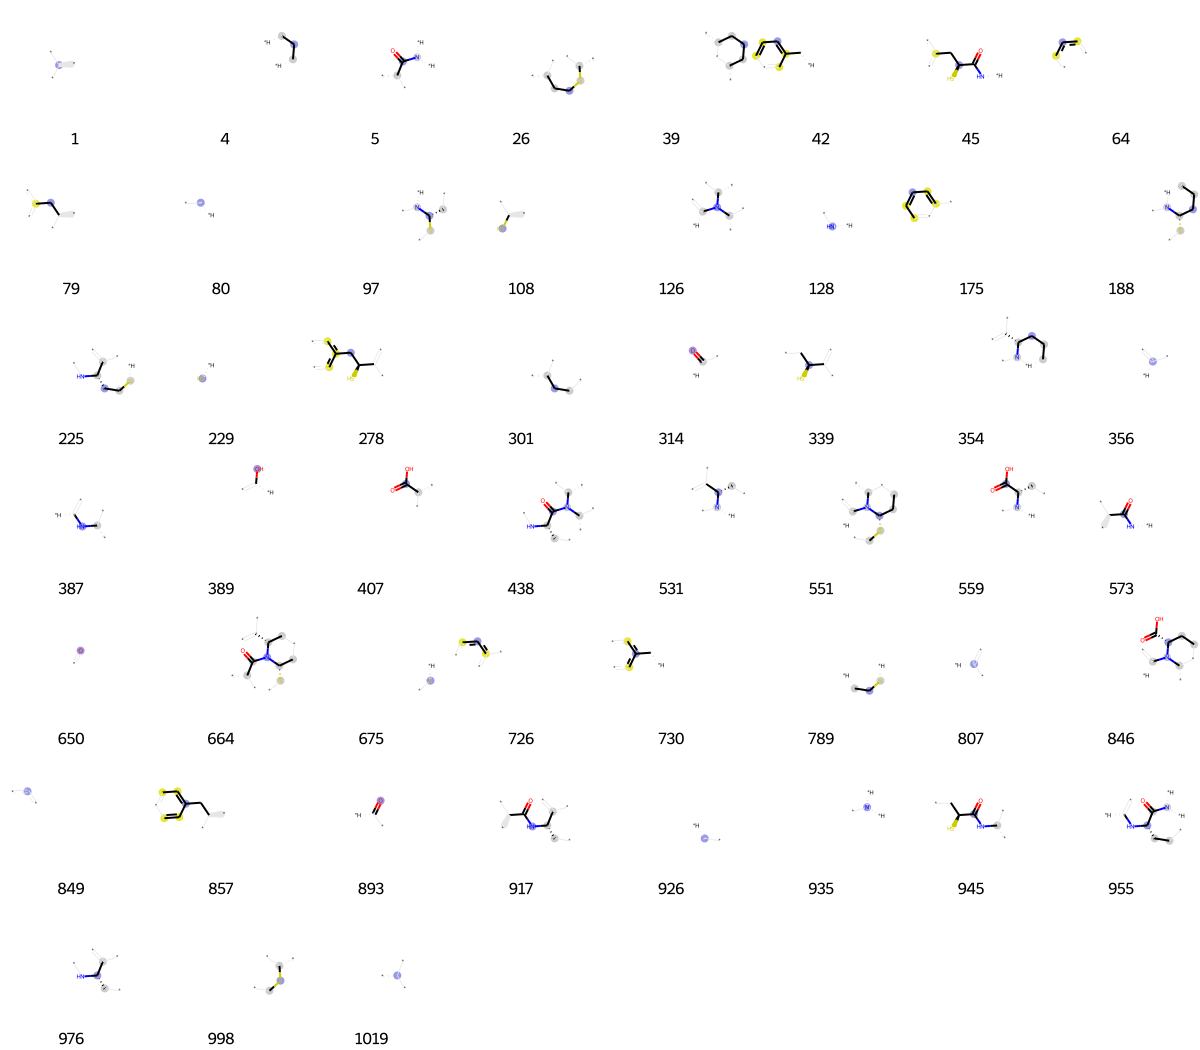

In [4031]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [4033]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[4,
 23,
 36,
 40,
 47,
 90,
 119,
 130,
 132,
 136,
 138,
 222,
 302,
 333,
 352,
 356,
 366,
 389,
 408,
 456,
 484,
 556,
 561,
 567,
 597,
 608,
 650,
 659,
 693,
 726,
 806,
 807,
 849,
 855,
 875,
 893,
 896,
 908,
 913,
 926,
 967,
 986,
 1004]

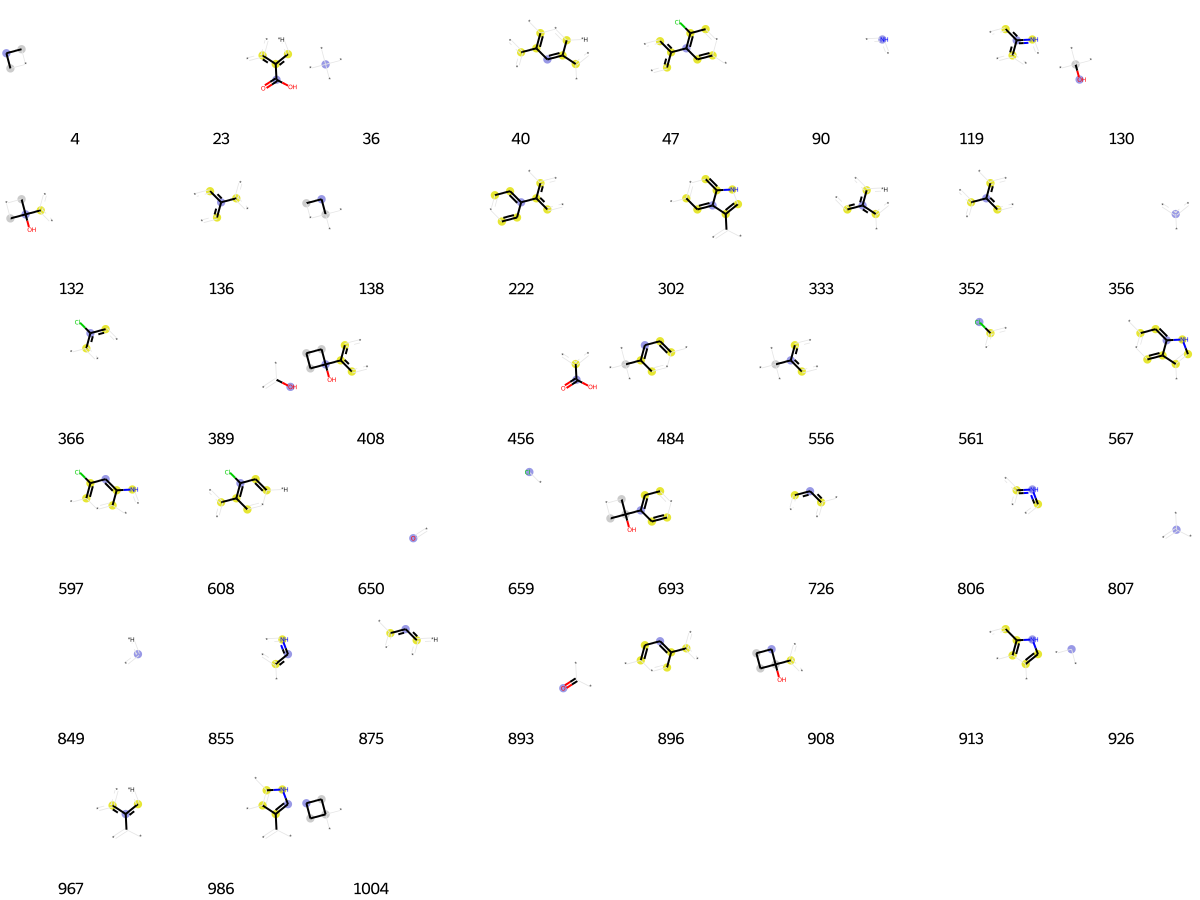

In [4035]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [4037]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[33,
 34,
 36,
 50,
 86,
 116,
 138,
 155,
 184,
 188,
 240,
 250,
 258,
 267,
 280,
 301,
 308,
 314,
 356,
 365,
 389,
 409,
 412,
 418,
 453,
 463,
 478,
 555,
 598,
 600,
 647,
 650,
 679,
 714,
 715,
 732,
 757,
 781,
 807,
 831,
 849,
 857,
 889,
 893,
 926,
 938,
 981,
 1010,
 1019]

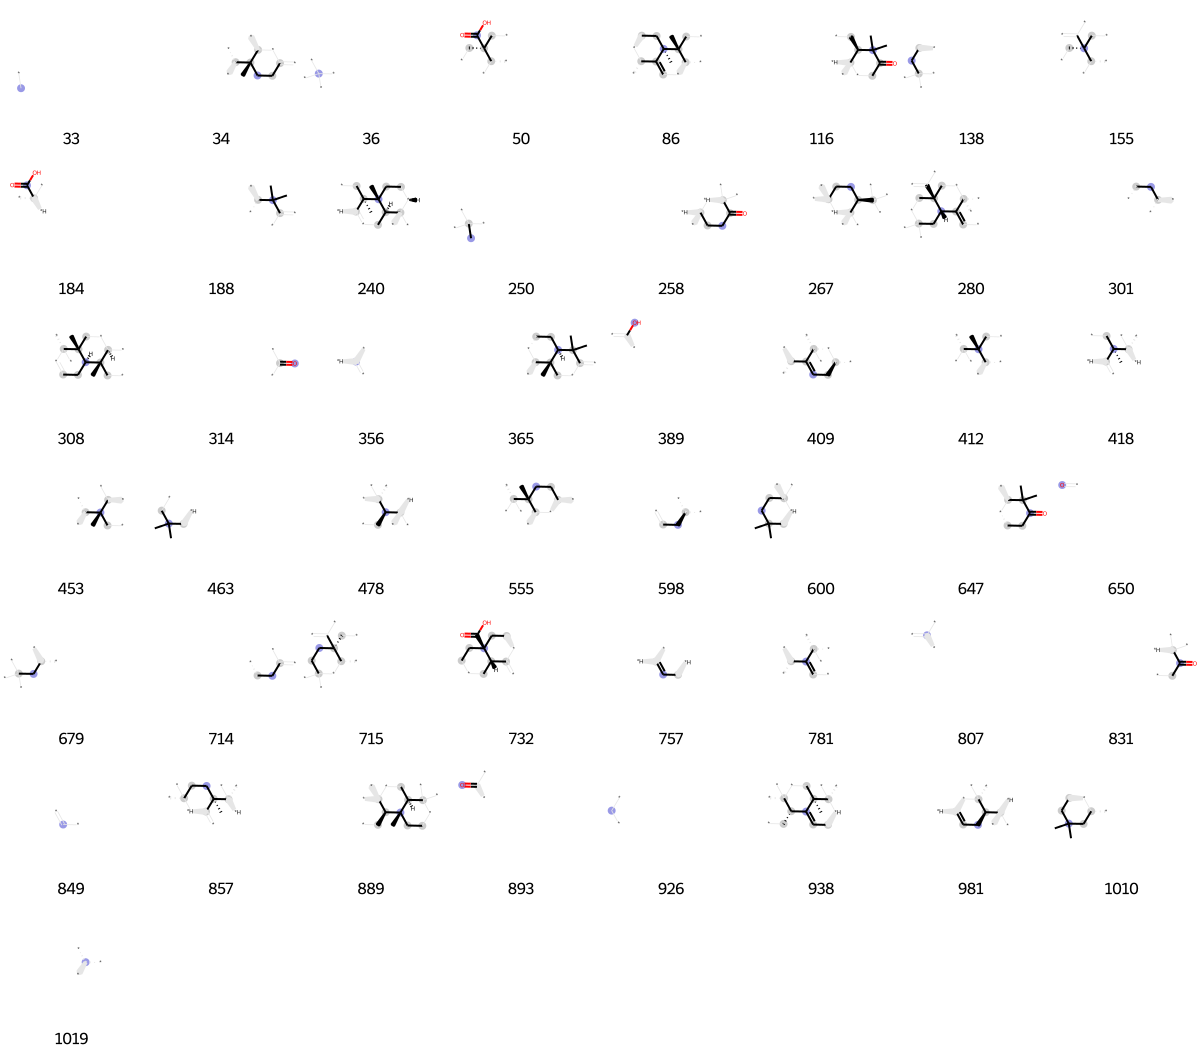

In [4039]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [4041]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[1,
 33,
 44,
 84,
 121,
 147,
 173,
 237,
 249,
 283,
 350,
 356,
 378,
 392,
 409,
 428,
 433,
 435,
 452,
 511,
 512,
 528,
 554,
 576,
 580,
 583,
 589,
 593,
 598,
 650,
 659,
 691,
 695,
 827,
 831,
 833,
 841,
 849,
 875,
 892,
 946,
 947,
 1008]

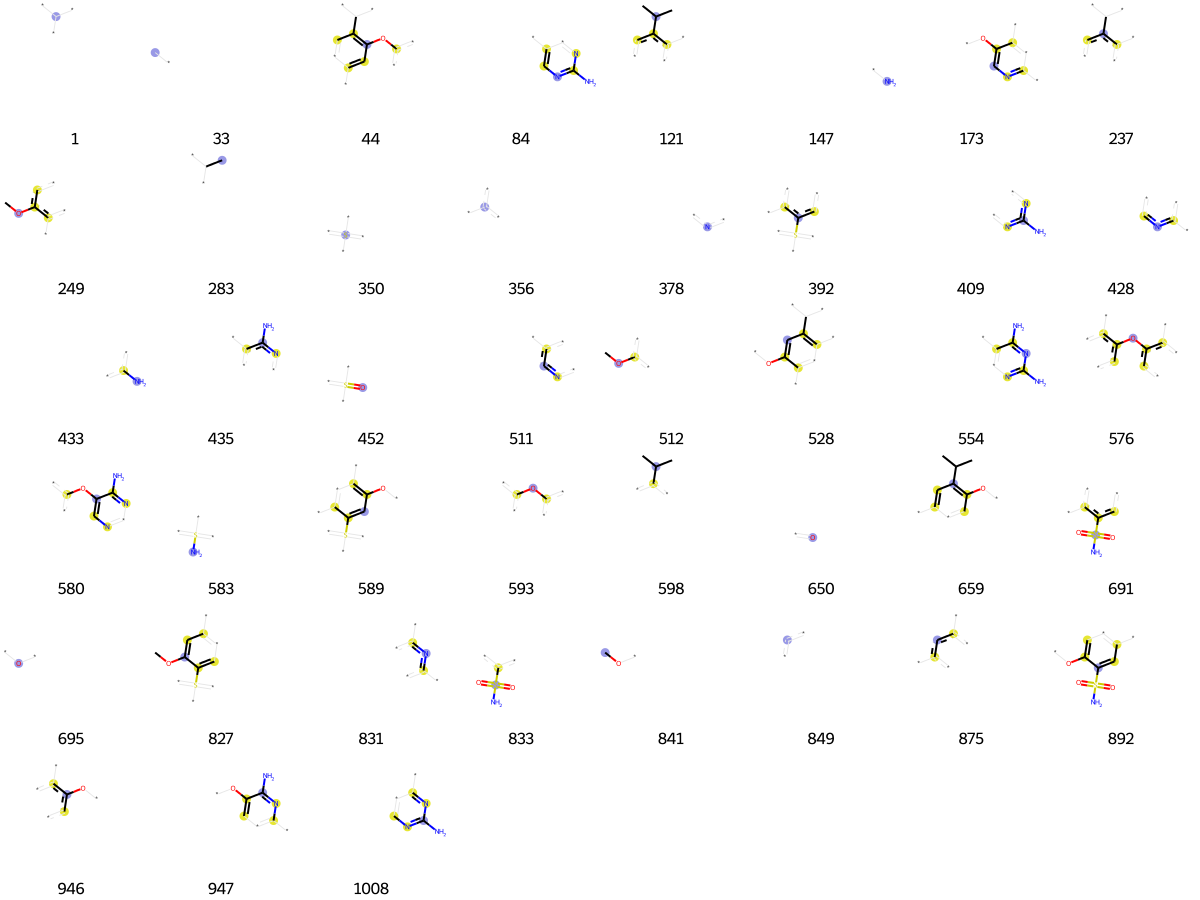

In [4043]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [4045]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[1,
 33,
 64,
 73,
 90,
 92,
 119,
 131,
 145,
 168,
 175,
 184,
 230,
 248,
 249,
 275,
 283,
 301,
 314,
 333,
 342,
 350,
 352,
 356,
 378,
 416,
 428,
 448,
 461,
 474,
 501,
 511,
 512,
 518,
 567,
 577,
 613,
 624,
 650,
 656,
 673,
 695,
 698,
 721,
 723,
 726,
 732,
 758,
 771,
 835,
 841,
 842,
 845,
 849,
 862,
 875,
 935,
 946,
 953,
 987,
 1019]

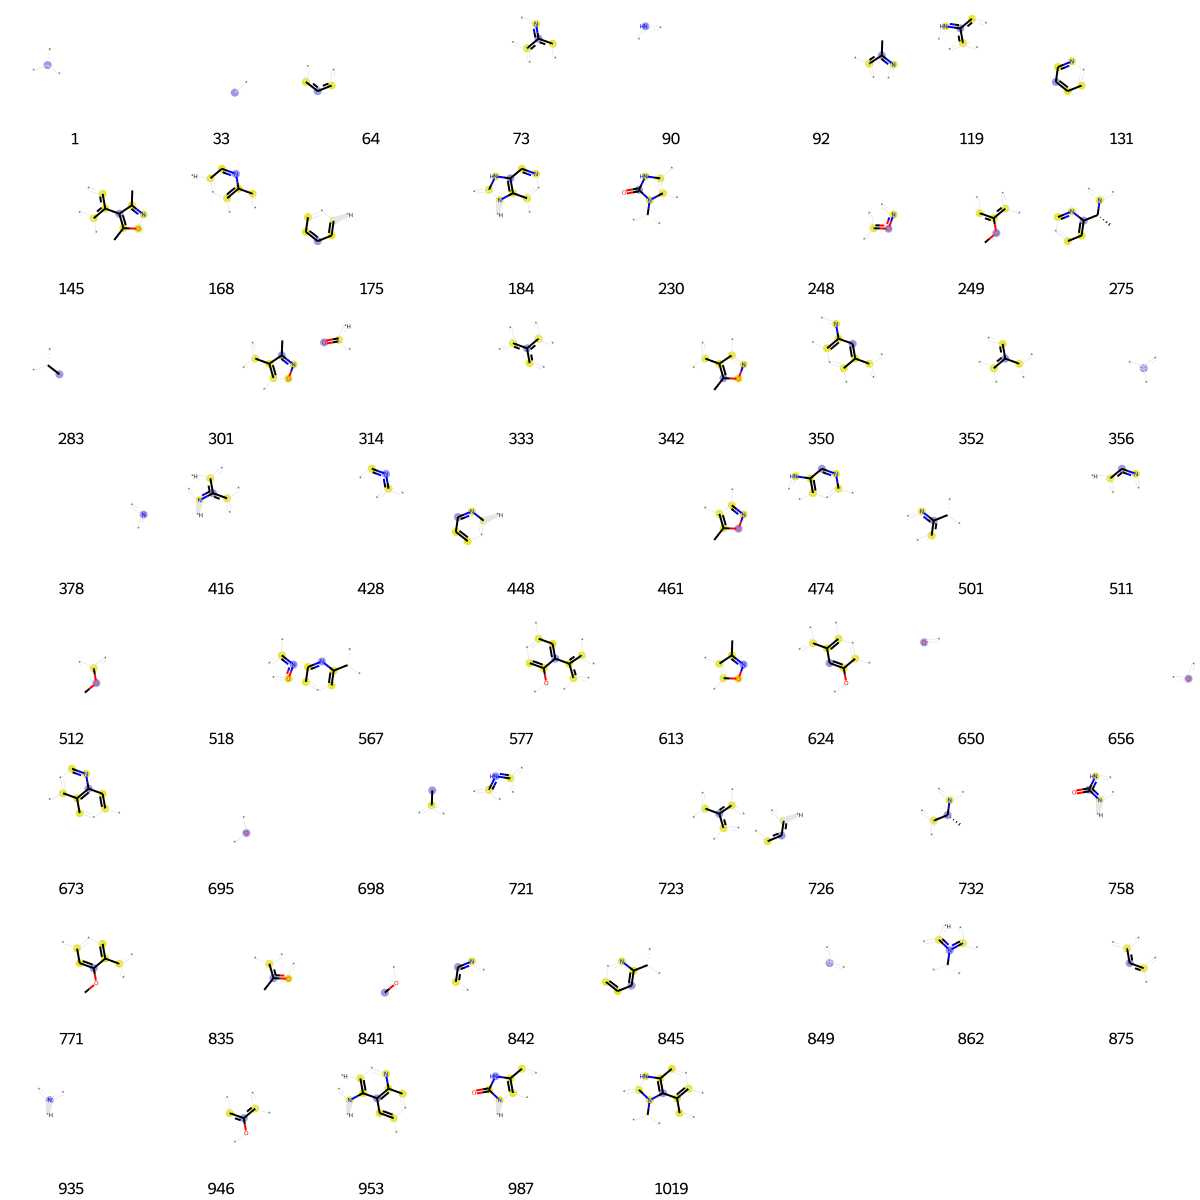

In [4047]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [4049]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[15,
 29,
 36,
 74,
 80,
 90,
 130,
 138,
 150,
 202,
 212,
 214,
 231,
 248,
 264,
 270,
 301,
 311,
 356,
 361,
 389,
 451,
 456,
 470,
 474,
 556,
 578,
 583,
 632,
 647,
 649,
 656,
 682,
 721,
 726,
 736,
 737,
 750,
 784,
 807,
 849,
 889,
 908,
 926,
 935,
 940,
 956,
 998,
 1019,
 1021]

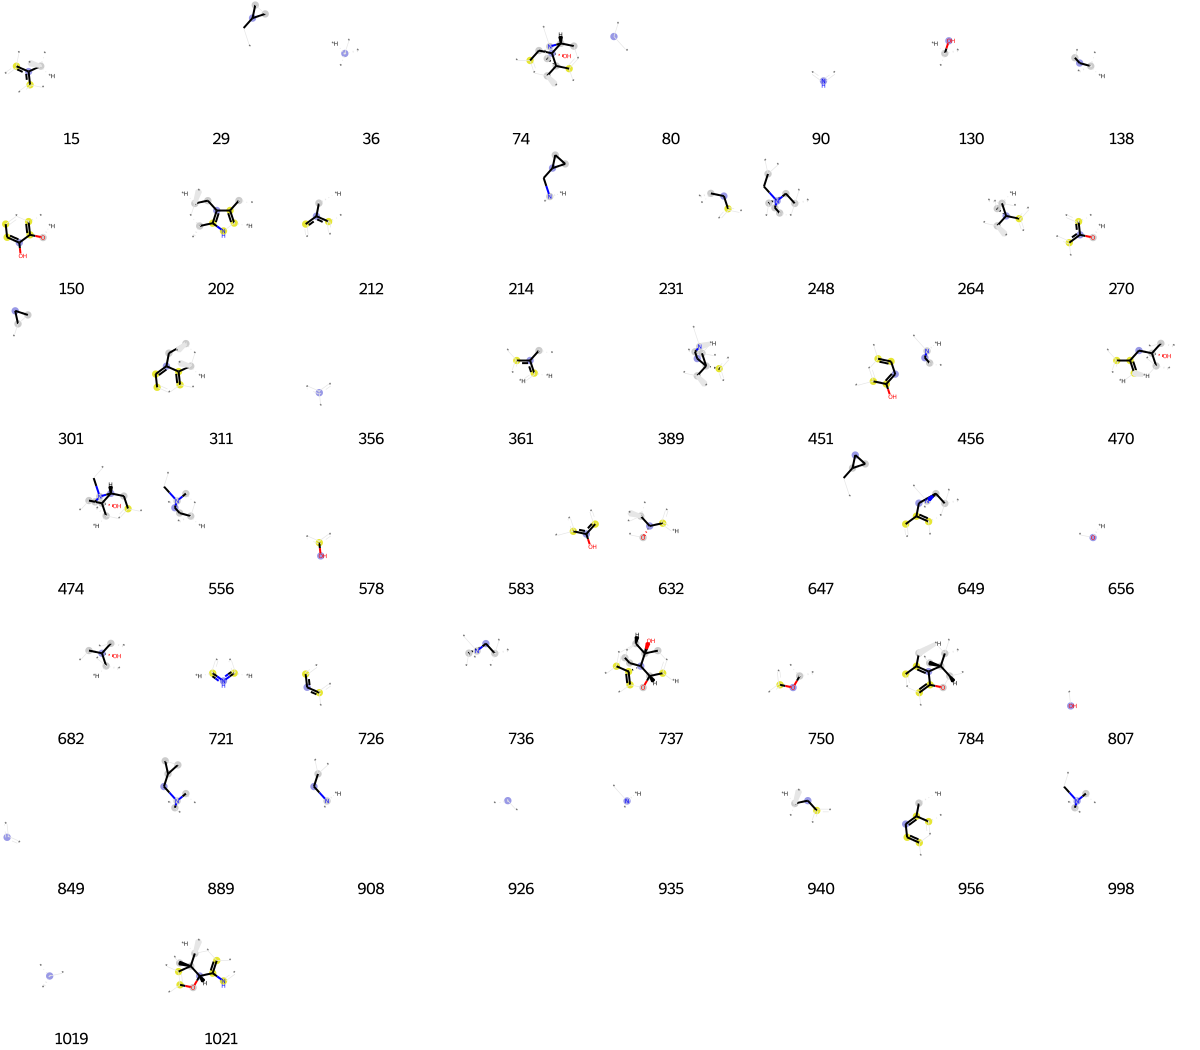

In [4051]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [4053]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[1,
 4,
 33,
 41,
 65,
 80,
 99,
 114,
 128,
 158,
 191,
 197,
 210,
 236,
 253,
 283,
 288,
 314,
 356,
 452,
 456,
 597,
 622,
 650,
 667,
 688,
 714,
 745,
 796,
 798,
 807,
 881,
 893,
 926,
 927,
 935,
 993]

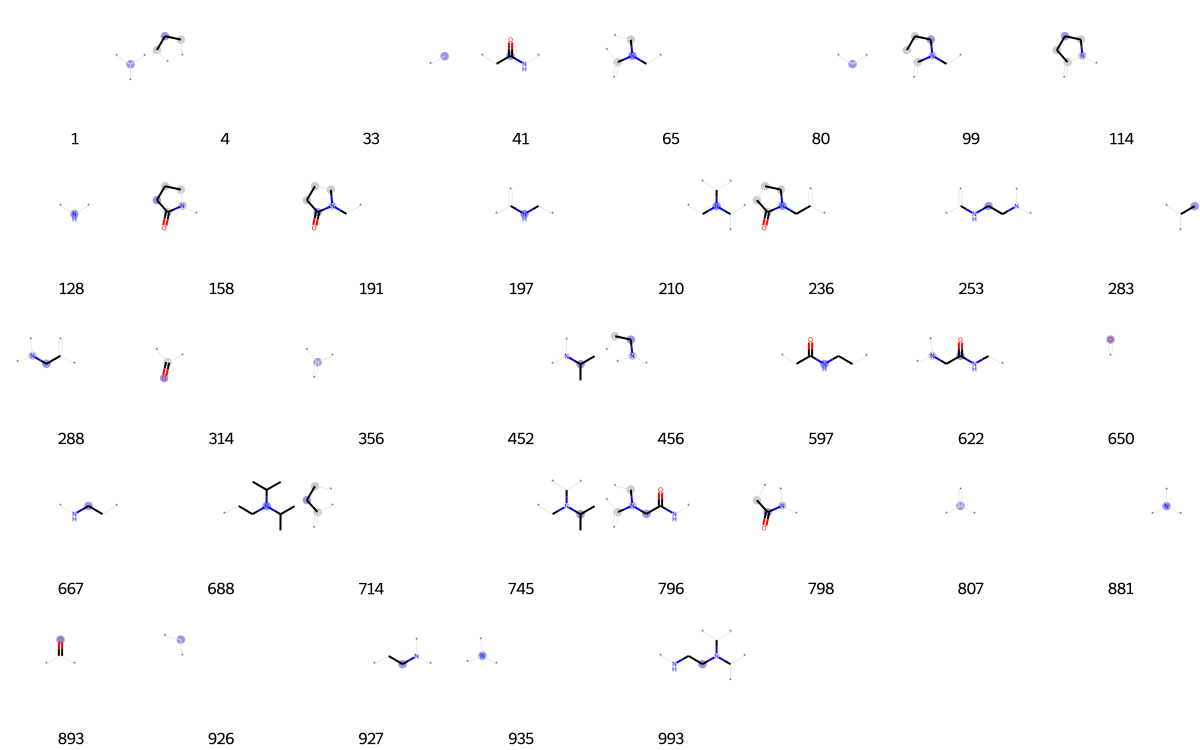

In [4055]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [4057]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[1,
 33,
 121,
 138,
 237,
 283,
 351,
 352,
 356,
 367,
 377,
 385,
 422,
 598,
 659,
 661,
 692,
 695,
 698,
 849,
 875,
 894,
 937,
 946]

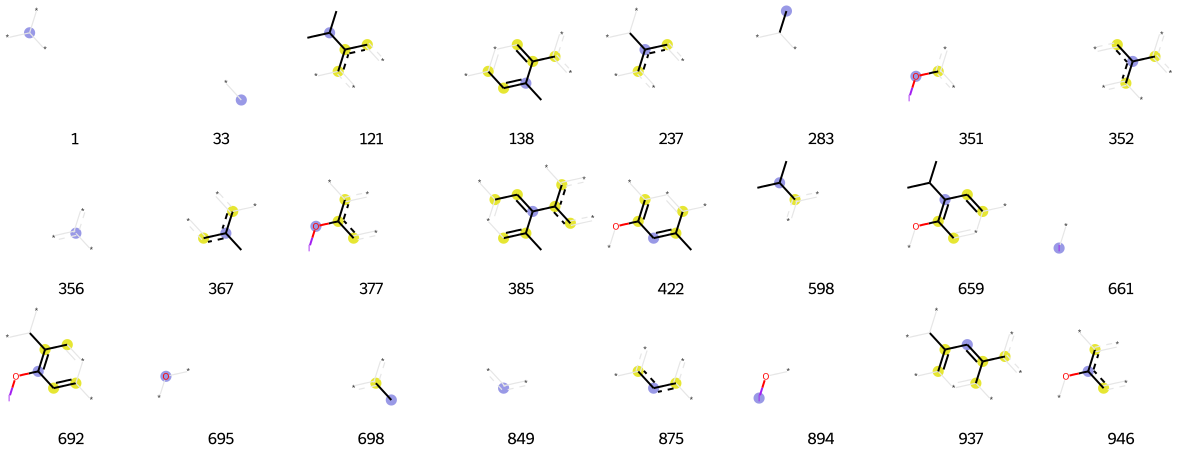

In [4059]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [4061]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[25,
 64,
 66,
 74,
 90,
 119,
 122,
 175,
 284,
 305,
 333,
 356,
 361,
 366,
 378,
 423,
 456,
 480,
 487,
 492,
 497,
 549,
 568,
 573,
 584,
 650,
 673,
 694,
 726,
 759,
 807,
 835,
 849,
 853,
 856,
 878,
 893,
 926,
 935,
 942,
 980,
 985,
 996,
 1009]

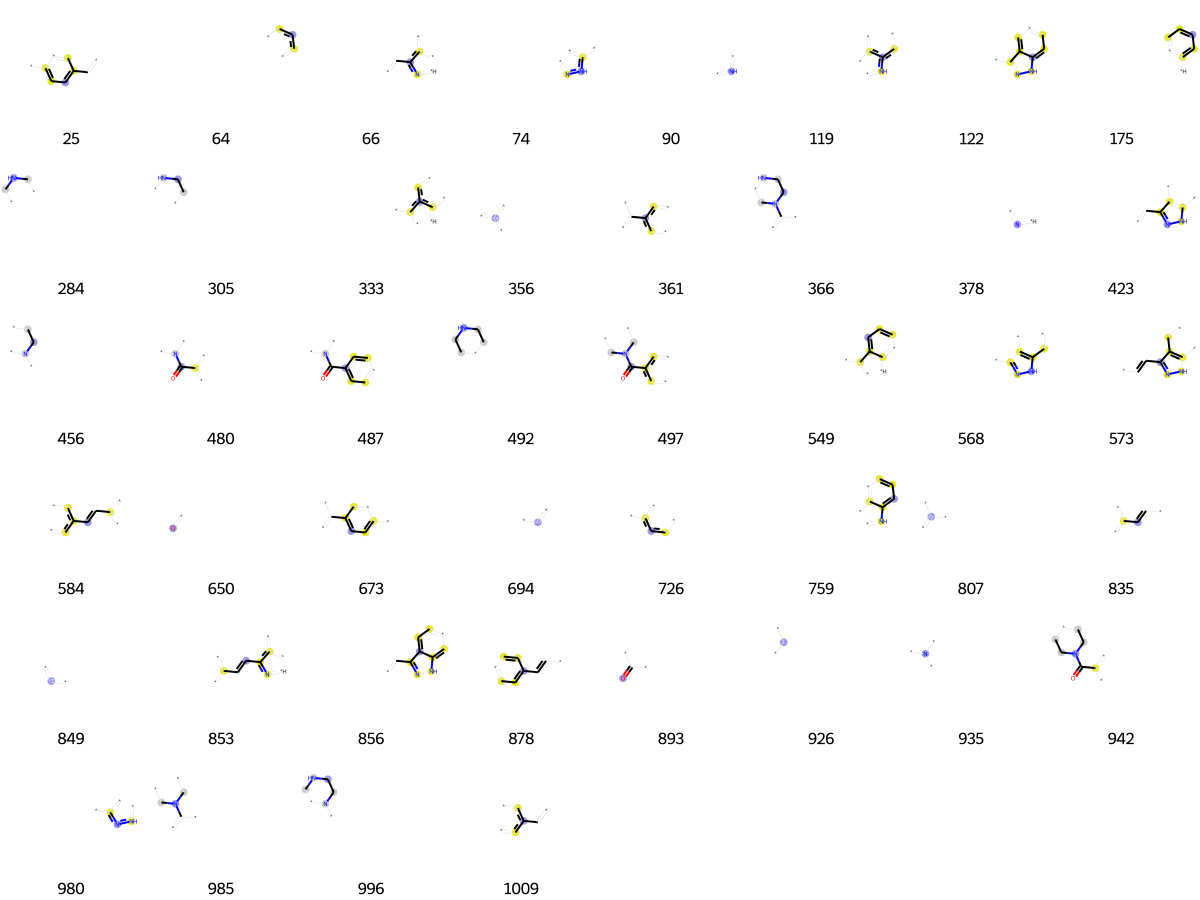

In [4063]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [4065]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[24,
 33,
 45,
 64,
 73,
 80,
 128,
 175,
 197,
 235,
 255,
 264,
 265,
 271,
 295,
 325,
 356,
 361,
 366,
 367,
 378,
 428,
 486,
 526,
 561,
 564,
 573,
 577,
 599,
 639,
 650,
 659,
 667,
 673,
 693,
 698,
 704,
 726,
 736,
 799,
 807,
 813,
 849,
 875,
 893,
 932,
 935,
 954,
 966,
 974,
 997,
 1000,
 1013]

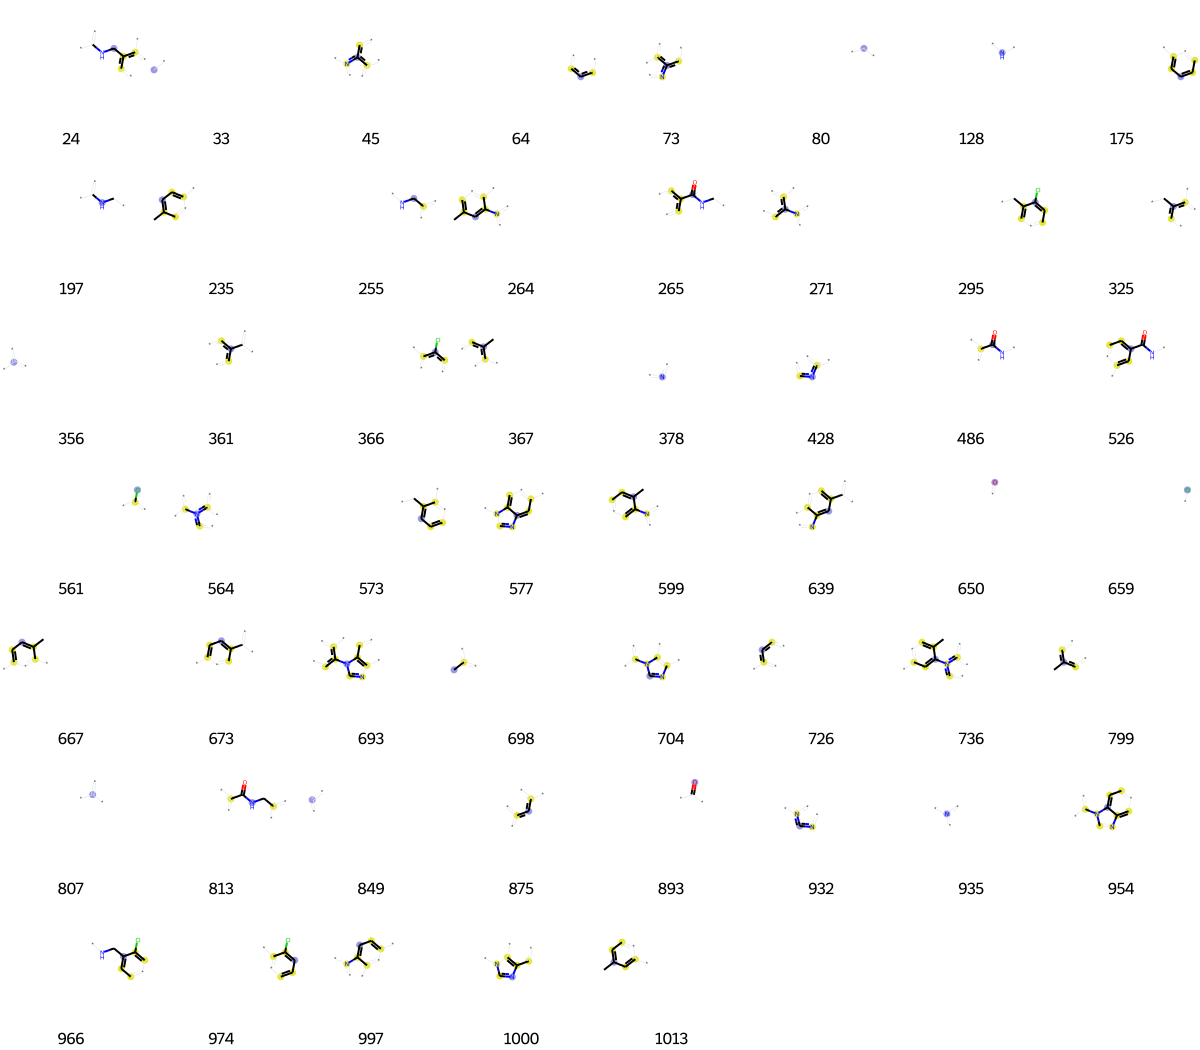

In [4067]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [4069]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[6,
 15,
 29,
 32,
 33,
 36,
 41,
 45,
 63,
 64,
 73,
 80,
 147,
 200,
 203,
 231,
 250,
 260,
 271,
 279,
 301,
 312,
 322,
 335,
 356,
 378,
 379,
 407,
 428,
 449,
 456,
 477,
 522,
 523,
 527,
 563,
 564,
 577,
 623,
 635,
 656,
 677,
 695,
 700,
 704,
 718,
 726,
 770,
 808,
 831,
 849,
 862,
 875,
 906,
 926,
 932,
 935,
 954,
 997,
 1000,
 1019]

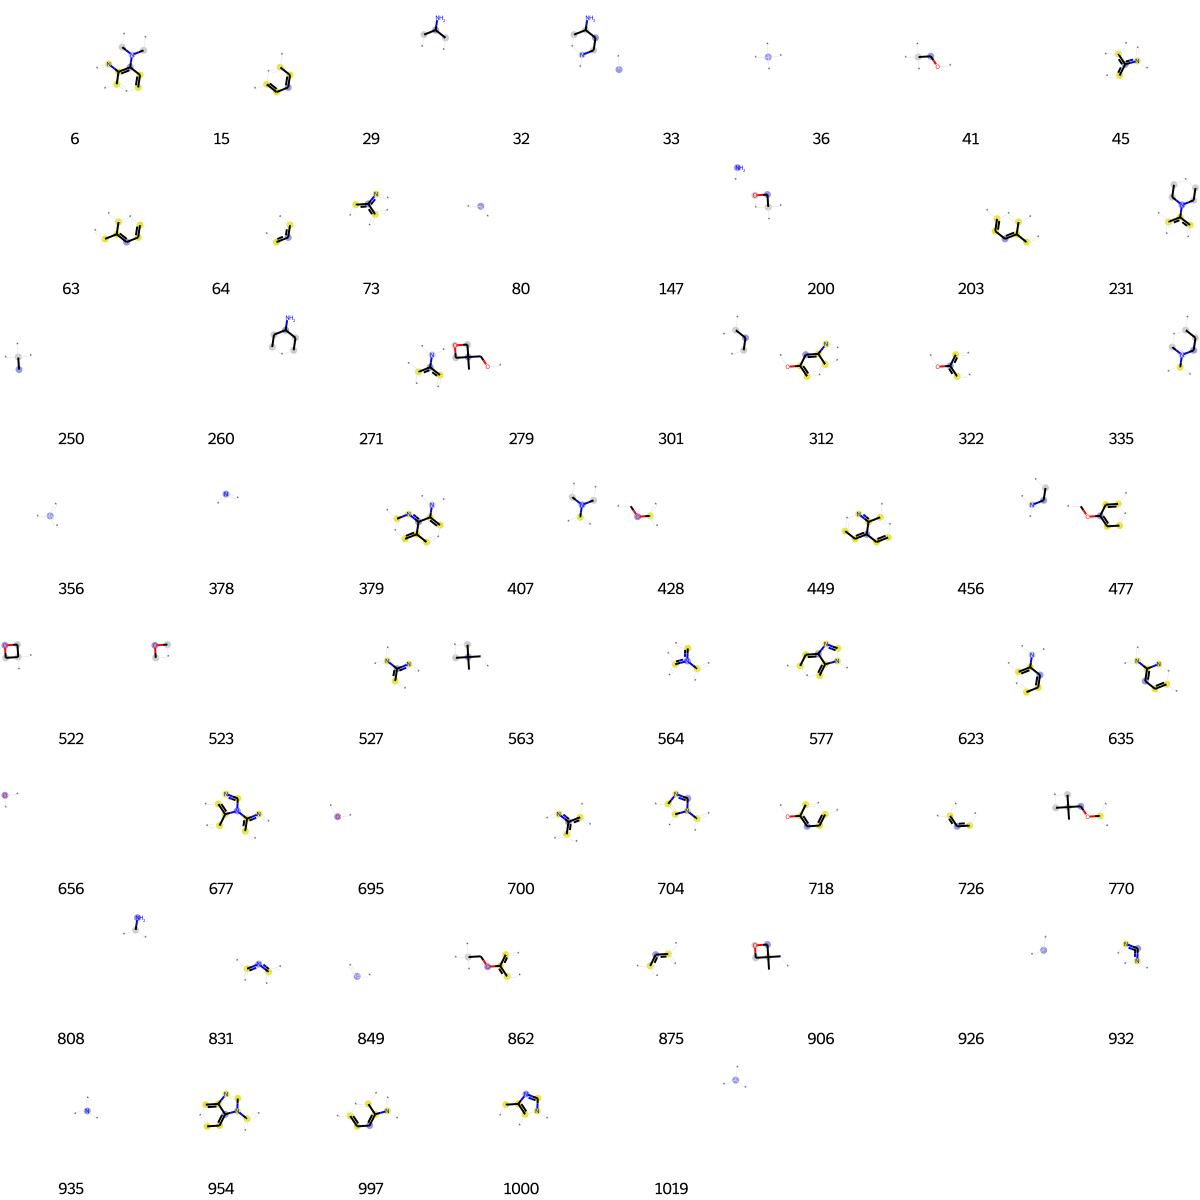

In [4071]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [4073]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[3,
 31,
 33,
 36,
 64,
 90,
 107,
 175,
 212,
 231,
 237,
 250,
 284,
 297,
 356,
 369,
 371,
 378,
 389,
 436,
 460,
 508,
 546,
 650,
 670,
 673,
 684,
 694,
 726,
 752,
 807,
 840,
 849,
 893,
 926,
 956,
 976,
 1019]

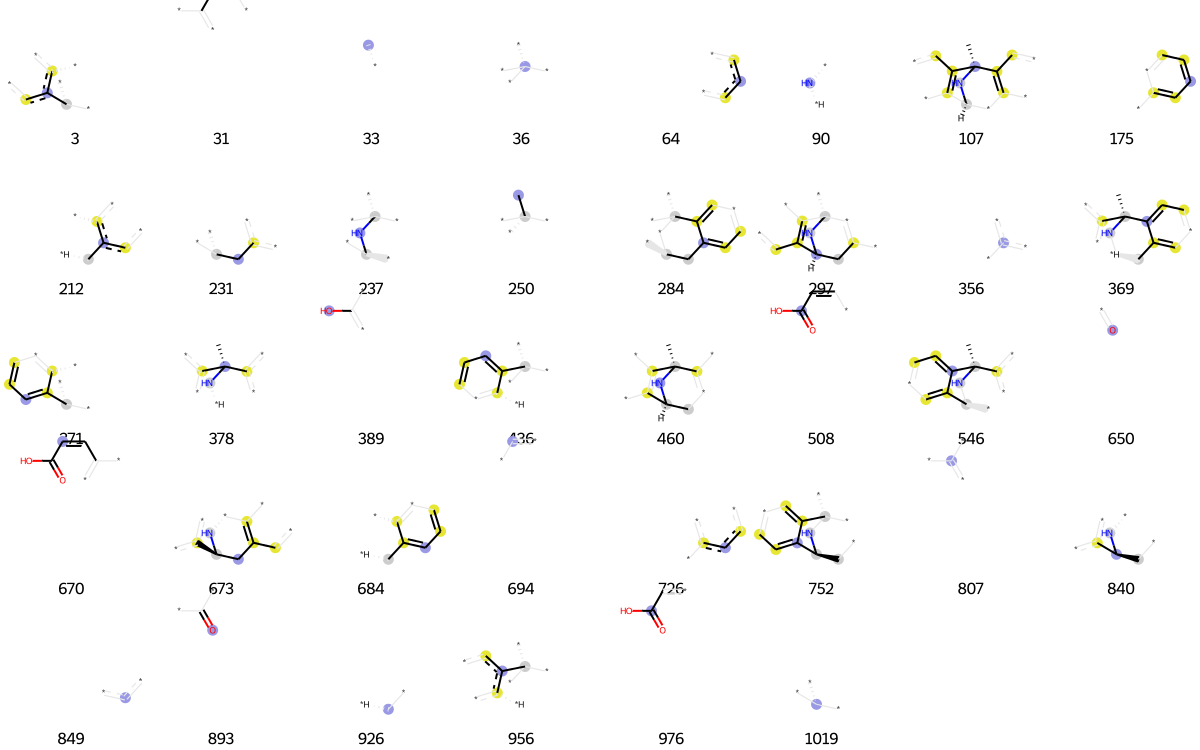

In [4075]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [4077]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[1, 33, 115, 147, 227, 283, 378, 389, 650, 669, 727, 786, 807, 820, 858, 893]

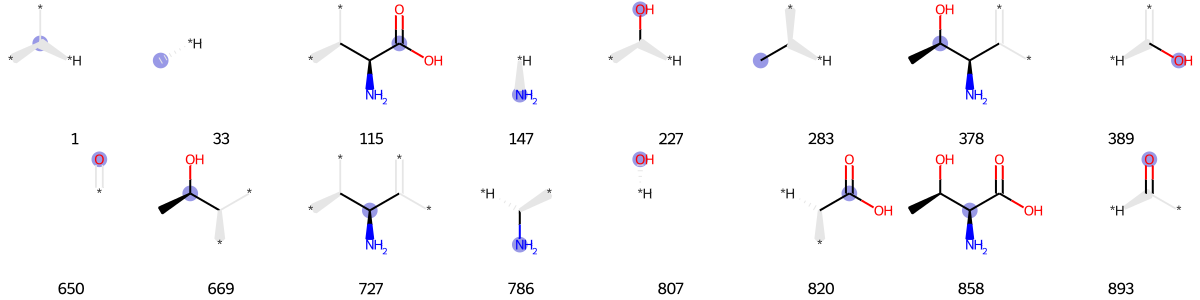

In [4079]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [4081]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[114, 305, 389, 650, 659, 803, 807, 876, 893, 953]

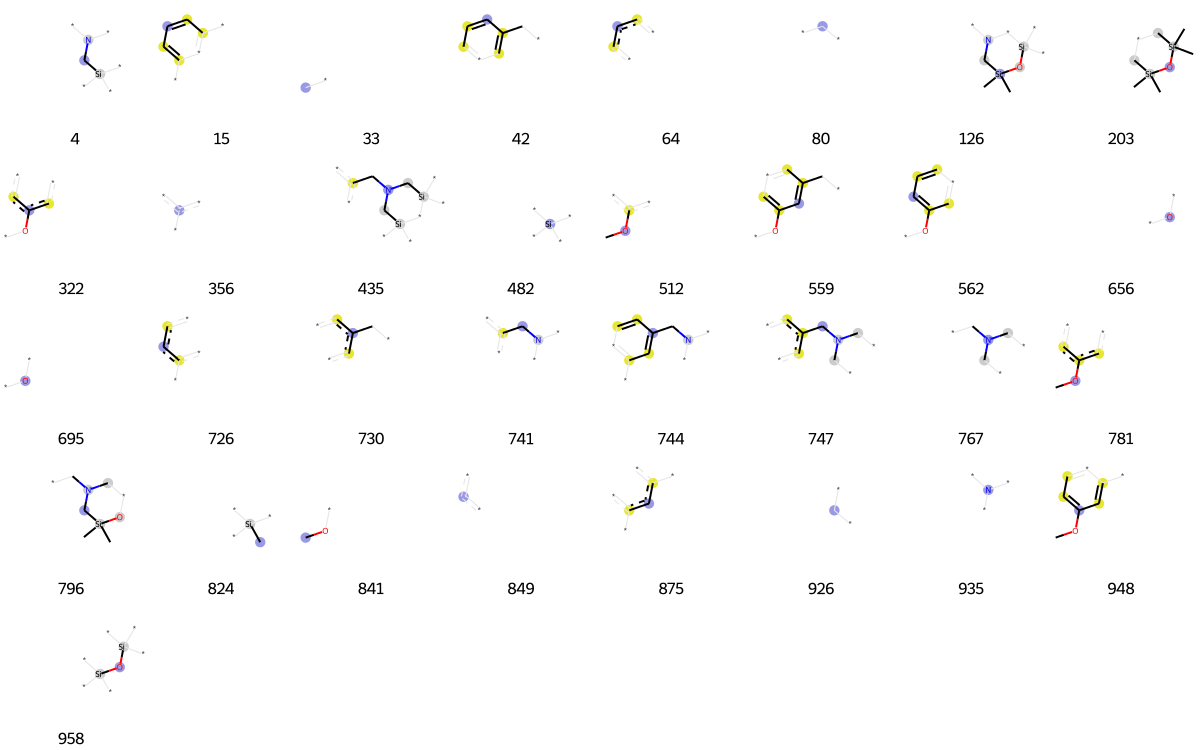

In [4083]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [4085]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[1,
 33,
 64,
 80,
 94,
 114,
 128,
 175,
 191,
 249,
 255,
 283,
 301,
 315,
 323,
 325,
 341,
 356,
 361,
 389,
 392,
 393,
 399,
 453,
 456,
 512,
 545,
 557,
 585,
 590,
 593,
 637,
 641,
 648,
 655,
 659,
 679,
 695,
 726,
 830,
 841,
 849,
 863,
 875,
 883,
 885,
 926,
 935,
 944,
 946,
 1019]

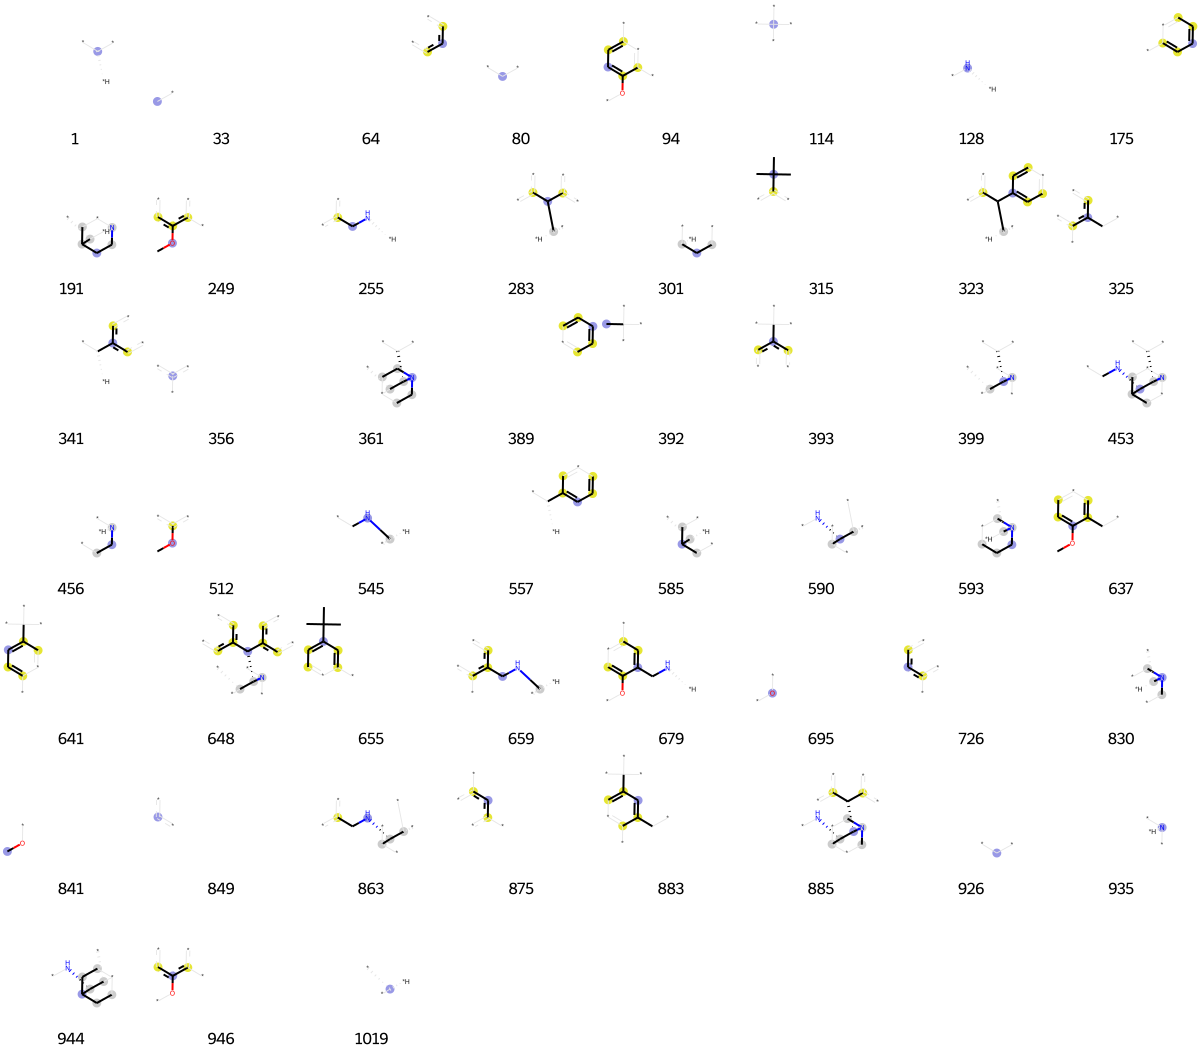

In [4087]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [4089]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[33,
 64,
 128,
 171,
 175,
 193,
 200,
 240,
 246,
 250,
 322,
 350,
 356,
 389,
 409,
 452,
 547,
 562,
 593,
 650,
 667,
 692,
 695,
 715,
 726,
 753,
 785,
 790,
 832,
 838,
 849,
 875,
 916,
 934,
 939,
 946,
 951]

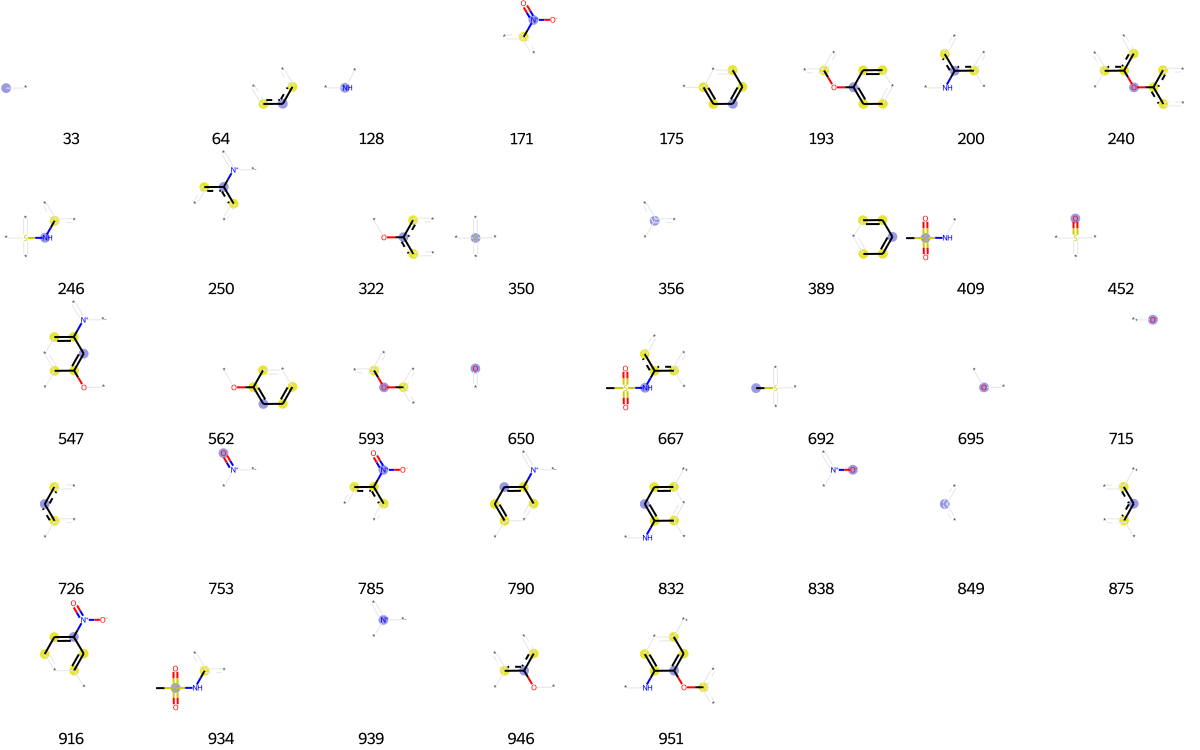

In [4091]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [4093]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[4,
 33,
 53,
 128,
 171,
 191,
 245,
 246,
 250,
 319,
 350,
 356,
 452,
 502,
 530,
 650,
 661,
 715,
 726,
 743,
 753,
 769,
 785,
 790,
 792,
 807,
 838,
 843,
 849,
 883,
 893,
 939,
 1017]

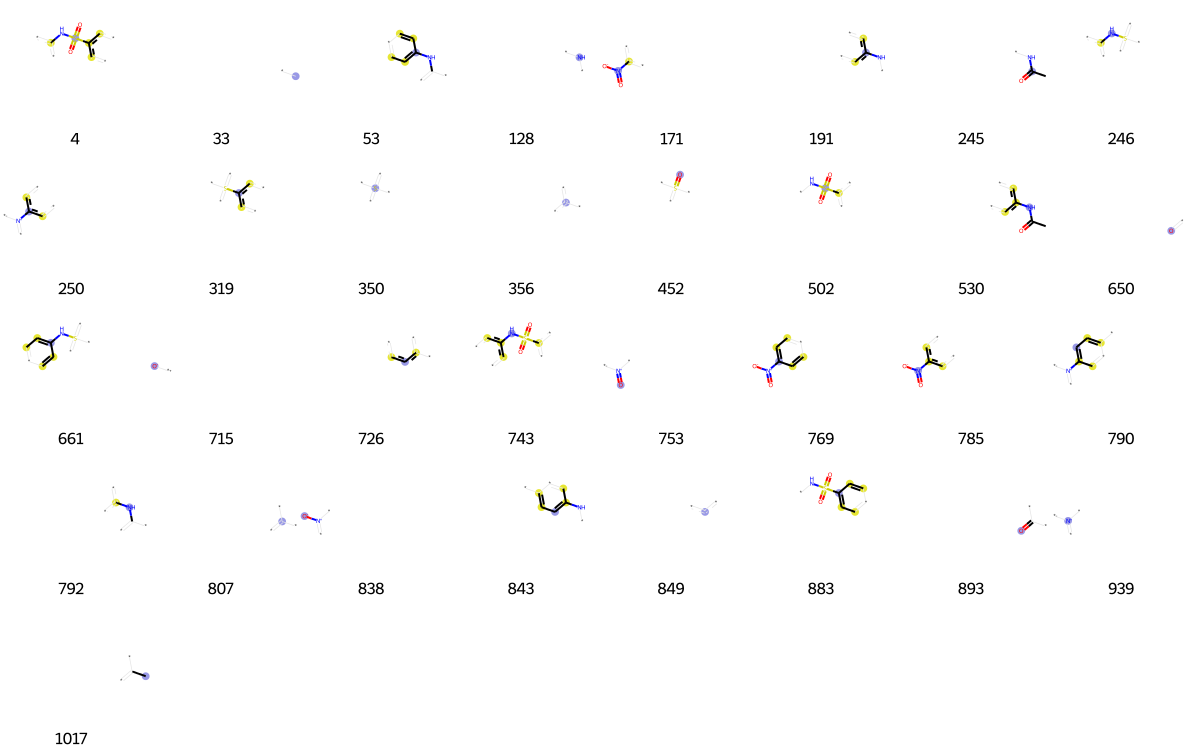

In [4095]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [4097]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[2,
 4,
 8,
 90,
 119,
 128,
 138,
 191,
 233,
 298,
 301,
 342,
 356,
 378,
 381,
 407,
 417,
 428,
 456,
 491,
 500,
 515,
 523,
 558,
 562,
 565,
 610,
 614,
 656,
 687,
 700,
 708,
 713,
 726,
 801,
 806,
 831,
 834,
 843,
 849,
 859,
 886,
 890,
 926,
 935,
 950,
 983,
 1014,
 1019]

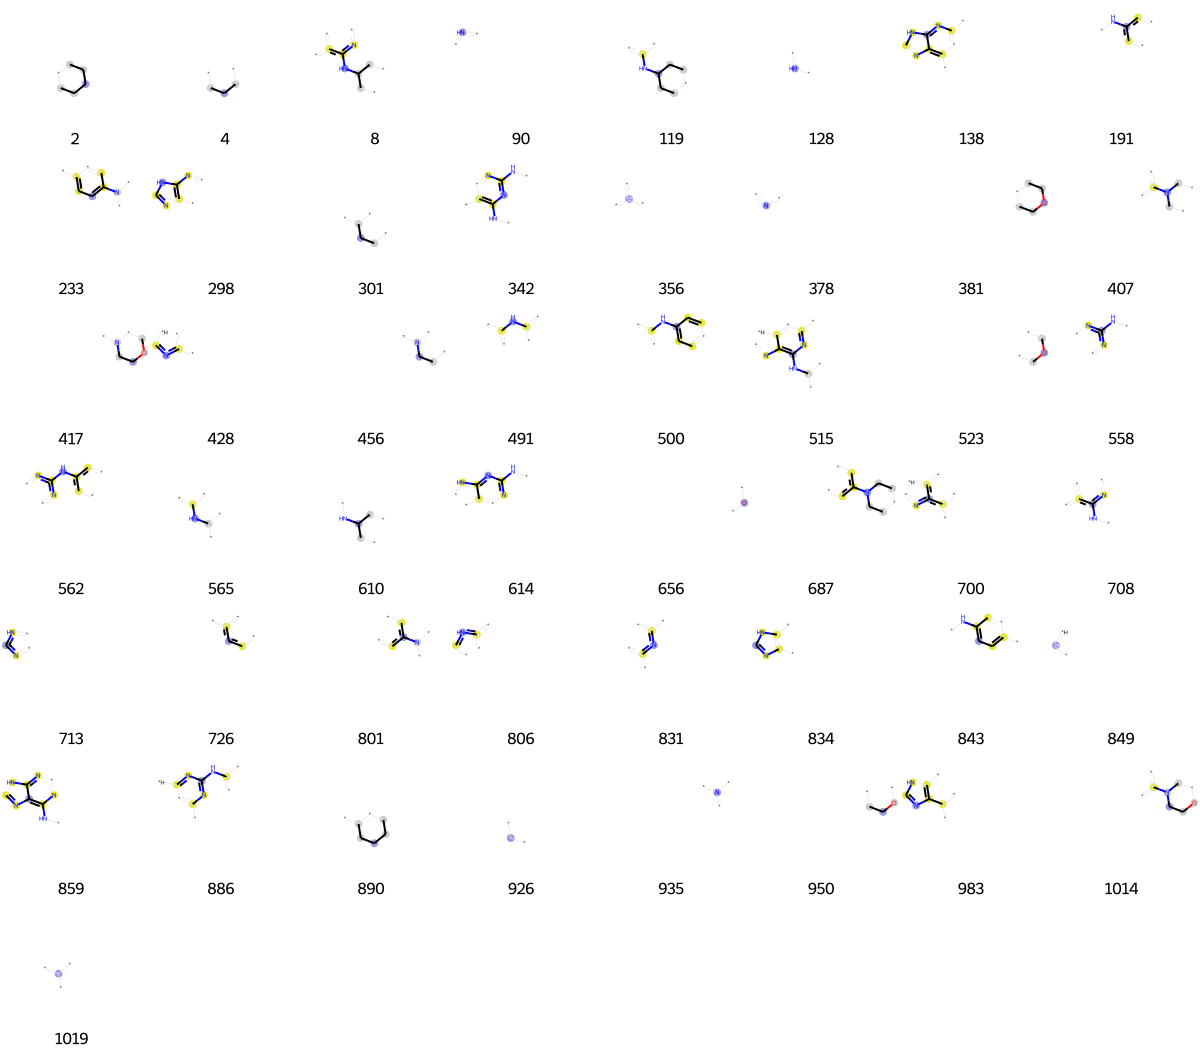

In [4099]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [4101]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[4,
 33,
 44,
 60,
 64,
 82,
 90,
 94,
 175,
 204,
 235,
 240,
 248,
 257,
 273,
 278,
 284,
 305,
 306,
 352,
 356,
 367,
 378,
 386,
 394,
 530,
 540,
 543,
 552,
 576,
 593,
 656,
 675,
 684,
 695,
 698,
 700,
 725,
 726,
 799,
 831,
 842,
 849,
 875,
 881,
 926,
 946,
 980,
 984,
 1013]

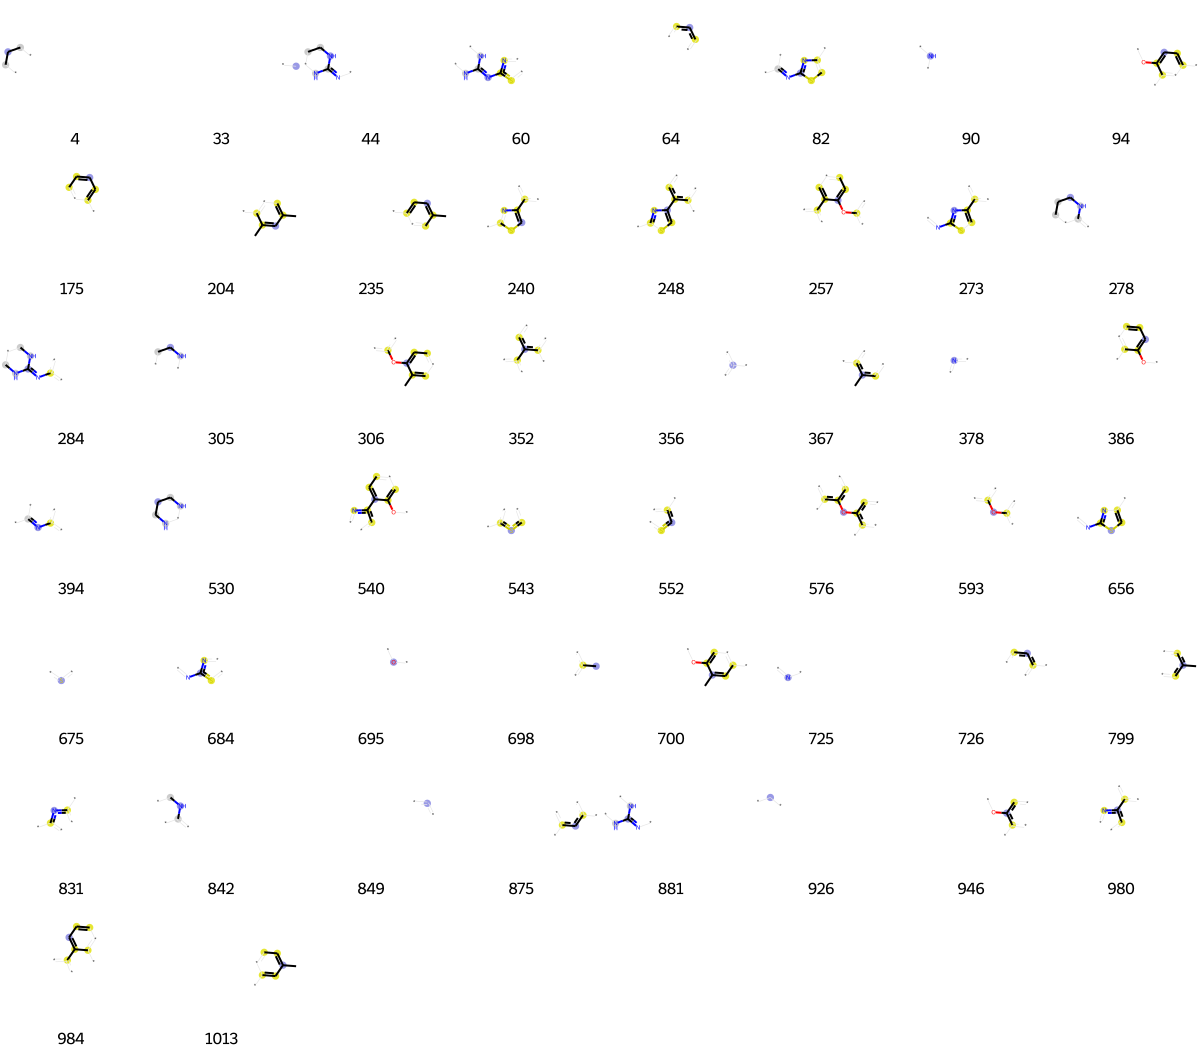

In [4103]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [4105]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[0,
 1,
 33,
 69,
 80,
 116,
 117,
 128,
 245,
 342,
 389,
 486,
 600,
 650,
 736,
 798,
 807,
 820,
 840,
 893,
 935,
 1017]

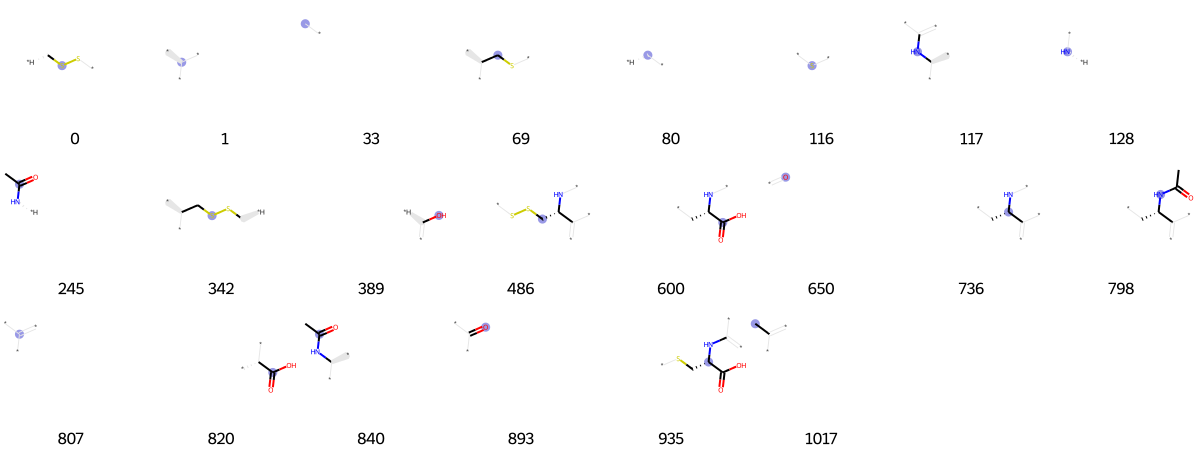

In [4107]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [4109]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[33,
 90,
 114,
 128,
 165,
 168,
 169,
 193,
 228,
 319,
 320,
 322,
 342,
 350,
 356,
 386,
 392,
 452,
 502,
 593,
 607,
 646,
 650,
 695,
 699,
 715,
 718,
 726,
 760,
 772,
 807,
 849,
 878,
 883,
 893,
 904,
 941]

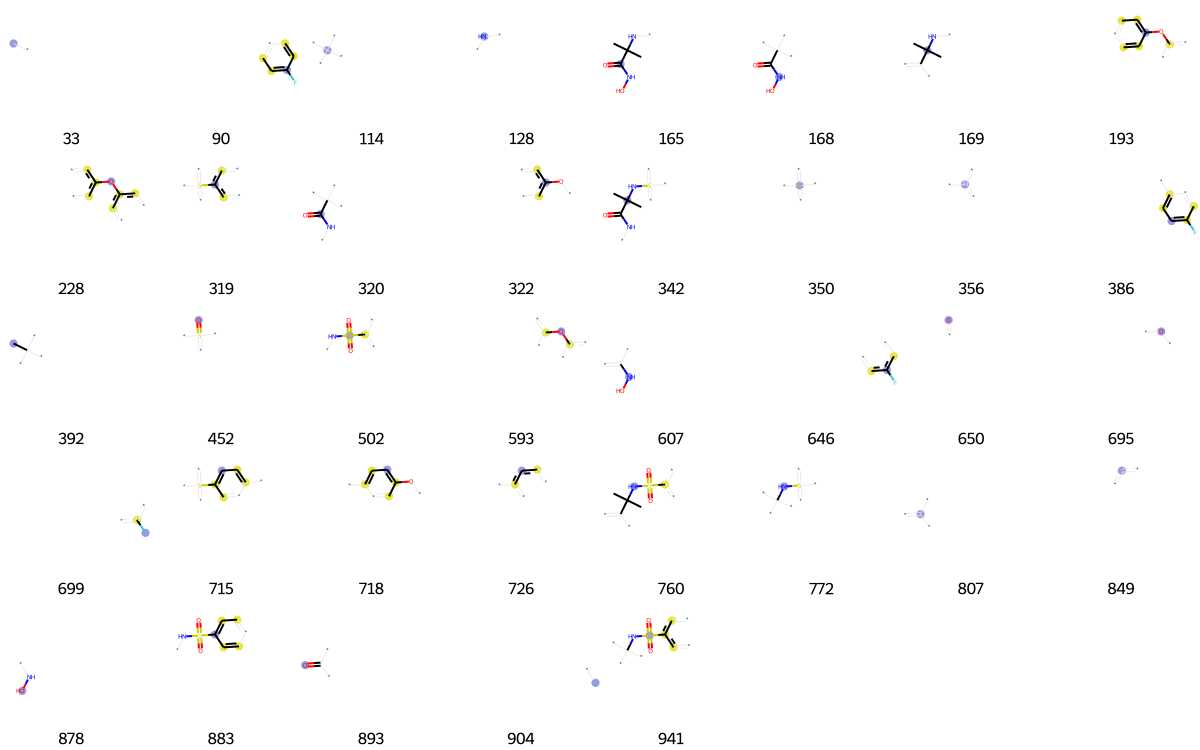

In [4111]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [4113]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[21,
 31,
 42,
 64,
 80,
 121,
 134,
 160,
 175,
 219,
 237,
 255,
 301,
 356,
 389,
 456,
 458,
 508,
 639,
 650,
 653,
 670,
 694,
 726,
 730,
 767,
 797,
 802,
 807,
 849,
 887,
 893,
 926,
 935,
 976,
 978,
 1019]

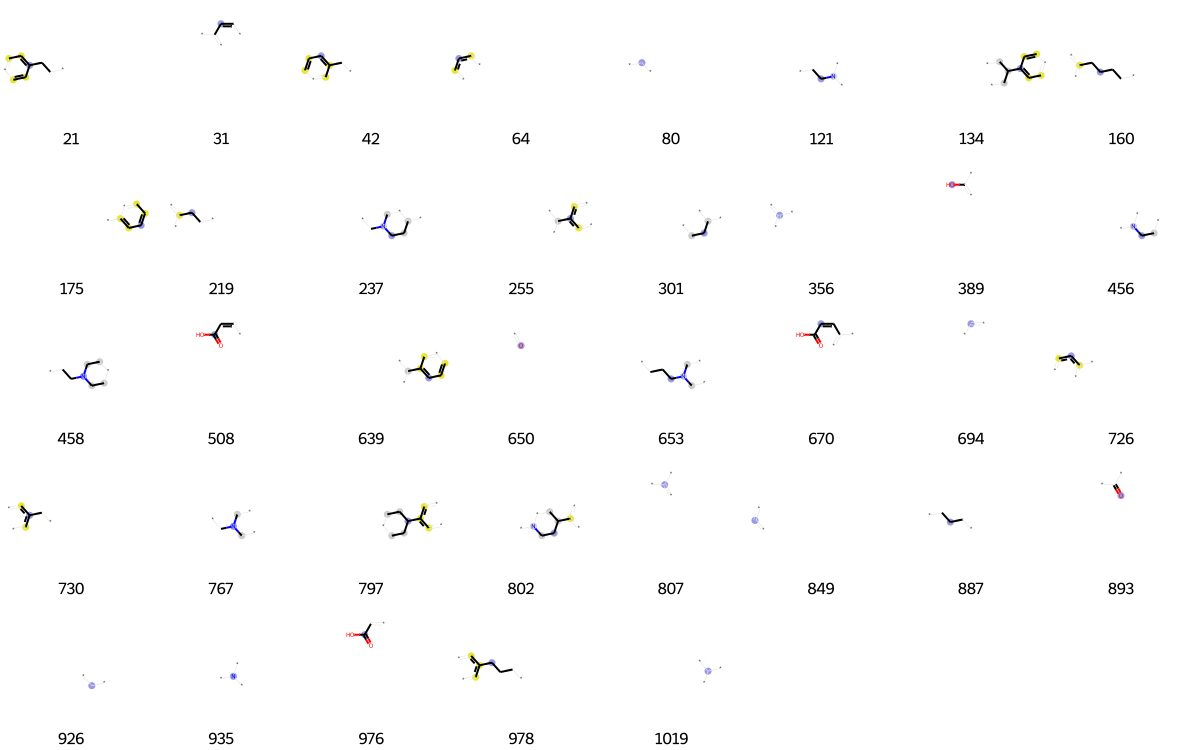

In [4115]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [4117]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[33,
 58,
 64,
 90,
 128,
 145,
 175,
 200,
 356,
 361,
 386,
 423,
 486,
 641,
 646,
 650,
 672,
 673,
 695,
 699,
 726,
 745,
 771,
 792,
 807,
 841,
 849,
 893,
 904,
 906,
 936,
 947,
 967]

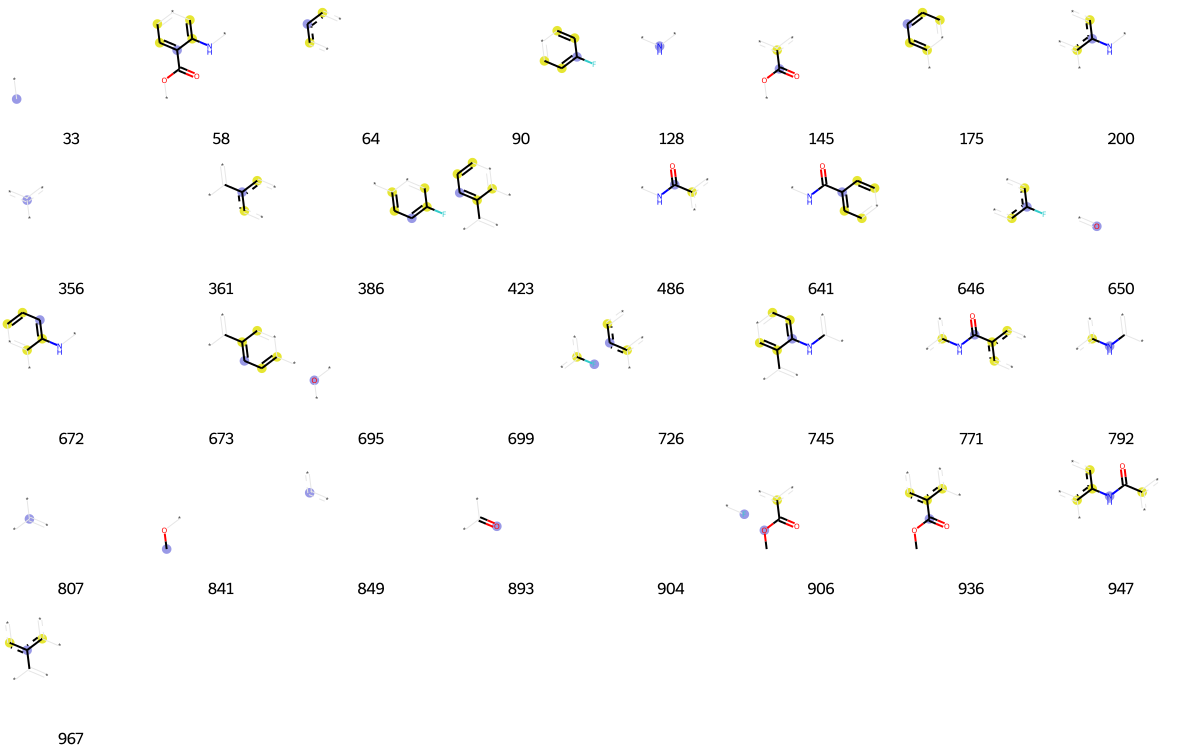

In [4119]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [4121]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[15,
 19,
 61,
 62,
 64,
 92,
 128,
 130,
 133,
 136,
 147,
 184,
 191,
 221,
 259,
 278,
 320,
 333,
 356,
 361,
 378,
 381,
 384,
 407,
 417,
 426,
 428,
 433,
 448,
 456,
 486,
 511,
 523,
 549,
 552,
 580,
 588,
 606,
 612,
 621,
 650,
 656,
 673,
 700,
 703,
 705,
 726,
 736,
 744,
 767,
 771,
 792,
 807,
 831,
 842,
 849,
 875,
 882,
 893,
 926,
 935,
 950,
 954,
 970,
 1014]

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


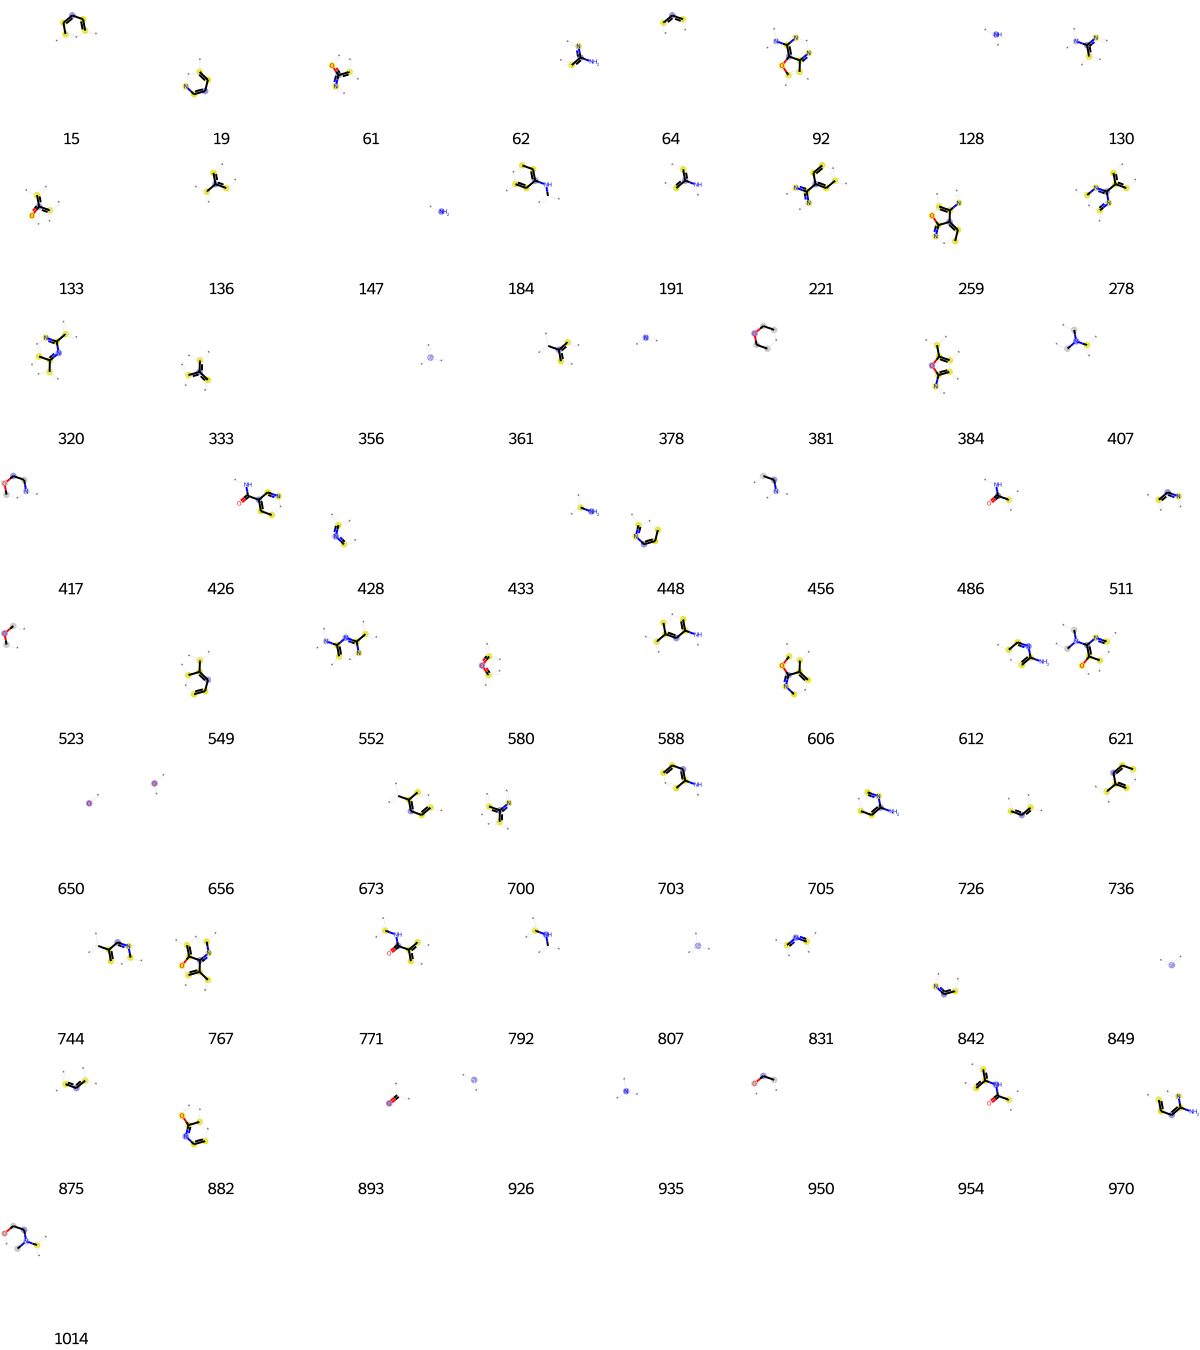

In [4123]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [4125]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[64, 175, 352, 356, 446, 503, 567, 643, 726, 823, 849, 976, 981, 984]

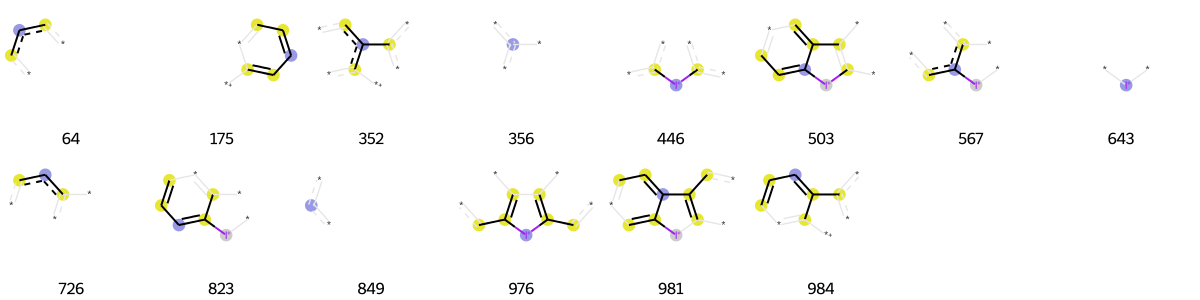

In [4127]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])